Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Änderungen BasicPRM

- Automated Planner Test:
  - IPBasicPRM_Roundtrip eingefügt
  - Eigene Methode für Planer erstellt
  - PlanRoundPath bei Visualisierung eingefügt
- IPBasicPRM_Roundtrip
  - erstellt aus IPBasicPRM
  - "Break" in "Continue" geändert bei "_learnRoadmapNearestNeighbour"
  - Funktion "PlanRoundPath" aus "PlanPath" erstellt
  - "InterimGoal" entsprechend "Start" und "Goal" eingefügt
  - InterimGoal in Lösungspfad eingebaut
- IPBenchmark
  - "InterimGoalList" eingefügt
- IPPlanerBase
  - "InterimGoalList" eingefügt
- IPTestSuite
  - Koordinate von InterimGoal hinzugefügt
- IPVISBasicPRM
  - Darstellung von Interim hinzugefügt

Adding all planners
===========


In [228]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [230]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 50
lazyConfig["updateRoadmapSize"]  = 2
lazyConfig["kNearest"] = 10
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [231]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [232]:
import IPTestSuite
import importlib

In [233]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'c:\\Users\\andre\\OneDrive - Hochschule Karlsruhe\\HS Karlsruhe\\1. Semester\\Roboterprogrammierung\\Projekt\\Git\\RKIM23RobotProgramDS\\02_eigeneNotebooks\\IPTestSuite.py'>

In [234]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [235]:
resultList = list()
testList = fullBenchList[:5]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            pass
    
HelperClass.HelperClass.printInColor(resultList[0].solution, 'blue')

        

Erstes Ziel Interim:[[3, 10], 7.810249675906654, 'interim0']
try-Pfad nach Löschung von Start:  [17, 'interim0']
While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [9, 15]
step [5.567948315209463, 14.338137045175813]
Removed nodeNumber mit Koordinaten: [5.567948315209463, 14.338137045175813]
Remove Nodenumer:  17

Kollision erkannt
MaxTry: 1
Trypath vor pop  ['start', 18, 'interim0']
TRYPATH-Umplanung nach Kollision: [18, 'interim0']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [9, 15]
step [6.427818400389523, 11.834056229864231]
Removed nodeNumber mit Koordinaten: [6.427818400389523, 11.834056229864231]
Remove Nodenumer:  18

Kollision erkannt
MaxTry: 2
Trypath vor pop  ['start', 27, 'interim0']
TRYPATH-Umplanung nach Kollision: [27, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [9, 15]
step [7.277883812412273, 11.131510261565174]
******* Check Edges for Collision
Step 27
Path start
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.424997783561733, 'interim0']


Ziel-Interim: [[3, 10], 4.424997783561733, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [3, 10]
******* Check Edges for Collision
Step interim0
Path 27
Collison zwischen interim0   27

Kollision erkannt
MaxTry: 3
Trypath vor pop  [27, 8, 'interim0']
TRYPATH-Umplanung nach Kollision: [8, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [1.0239493765679195, 11.262295770824347]
******* Check Edges for Collision
Step 8
Path 27
Collison zwischen 8   27

Kollision erkannt
MaxTry: 4
Trypath vor pop  [27, 15, 'interim0']
TRYPATH-Umplanung nach Kollision: [15, 'interim0']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [0.9155499985897322, 10.812573595121458]
******* Check Edges for Collision
Step 15
Path 27
Collison zwischen 15   27

Kollision erkannt
MaxTry: 5
Trypath vor pop  [27, 28, 'interim0']
TRYPATH-Umplanung nach Kollision: [28, 'interim0']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [0.63557517511537, 11.095920326666462]
******* Check Edges for Collision
Step 28
Path 27
Collison zwischen 28   27

Kollision erkannt
MaxTry: 6
Trypath vor pop  [27, 31, 'interim0']
TRYPATH-Umplanung nach Kollision: [31, 'interim0']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [0.548310238662028, 10.218121348493568]
******* Check Edges for Collision
Step 31
Path 27
Collison zwischen 31   27

Kollision erkannt
MaxTry: 7
Trypath vor pop  [27, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [46, 'interim0']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [4.740649877153096, 5.7265941905959785]
******* Check Edges for Collision
Step 46
Path 27
Collison zwischen 46   27

Kollision erkannt
MaxTry: 8
Trypath vor pop  [27, 50, 'interim0']
TRYPATH-Umplanung nach Kollision: [50, 'interim0']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [5.795702385033183, 7.852823533924697]
Removed nodeNumber mit Koordinaten: [5.795702385033183, 7.852823533924697]
Remove Nodenumer:  50

Kollision erkannt
MaxTry: 9
Trypath vor pop  [27, 51, 'interim0']
TRYPATH-Umplanung nach Kollision: [51, 'interim0']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [5.404582282200305, 7.741795484570507]
Removed nodeNumber mit Koordinaten: [5.404582282200305, 7.741795484570507]
Remove Nodenumer:  51

Kollision erkannt
MaxTry: 10
Trypath vor pop  [27, 60, 'interim0']
TRYPATH-Umplanung nach Kollision: [60, 'interim0']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [1.3600909324541417, 13.524519828980054]
******* Check Edges for Collision
Step 60
Path 27
Collison zwischen 60   27

Kollision erkannt
MaxTry: 11
Trypath vor pop  [27, 68, 'interim0']
TRYPATH-Umplanung nach Kollision: [68, 'interim0']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [0.7388046925529521, 11.516073042075286]
******* Check Edges for Collision
Step 68
Path 27
Collison zwischen 68   27

Kollision erkannt
MaxTry: 12
Trypath vor pop  [27, 72, 'interim0']
TRYPATH-Umplanung nach Kollision: [72, 'interim0']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [6.02543112892921, 8.578444691892273]
Removed nodeNumber mit Koordinaten: [6.02543112892921, 8.578444691892273]
Remove Nodenumer:  72

Kollision erkannt
MaxTry: 13
Trypath vor pop  [27, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [5, 2, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [9.974145499110437, 6.6688529363089755]
******* Check Edges for Collision
Step 5
Path 27
Collison zwischen 5   27

Kollision erkannt
MaxTry: 14
Trypath vor pop  [27, 24, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [24, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [12.146095805054607, 9.053462014345811]
******* Check Edges for Collision
Step 24
Path 27
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 8.334505241523571, 'interim4']


Ziel-Interim: [[10, 1], 8.334505241523571, 'interim4']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [12.146095805054607, 9.053462014345811]
step [9.974145499110437, 6.6688529363089755]
******* Check Edges for Collision
Step 5
Path 24
Collison zwischen 5   24

Kollision erkannt
MaxTry: 15
Trypath vor pop  [24, 37, 'interim4']
TRYPATH-Umplanung nach Kollision: [37, 'interim4']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [12.146095805054607, 9.053462014345811]
step [11.751450847716608, 4.961678840065543]
******* Check Edges for Collision
Step 37
Path 24
Collison zwischen 37   24

Kollision erkannt
MaxTry: 16
Trypath vor pop  [24, 38, 'interim4']
TRYPATH-Umplanung nach Kollision: [38, 'interim4']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [12.146095805054607, 9.053462014345811]
step [12.013172649525846, 3.476107232889128]
******* Check Edges for Collision
Step 38
Path 24
Collison zwischen 38   24

Kollision erkannt
MaxTry: 17
Trypath vor pop  [24, 30, 37, 'interim4']
TRYPATH-Umplanung nach Kollision: [30, 37, 'interim4']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [12.146095805054607, 9.053462014345811]
step [9.302147617477921, 10.011363757215014]
******* Check Edges for Collision
Step 30
Path 24
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 6.302157862784831, 'interim0']


Ziel-Interim: [[3, 10], 6.302157862784831, 'interim0']


Aktueller Node (step):  37
Path im Check and CollisonUpdate [9.302147617477921, 10.011363757215014]
step [11.751450847716608, 4.961678840065543]
******* Check Edges for Collision
Step 37
Path 30
Collison zwischen 37   30

Kollision erkannt
MaxTry: 18
Trypath vor pop  [30, 79, 'interim0']
TRYPATH-Umplanung nach Kollision: [79, 'interim0']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [9.302147617477921, 10.011363757215014]
step [7.224282689772119, 11.233646714286312]
******* Check Edges for Collision
Step 79
Path 30
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.400732718397902, 'interim0']


Ziel-Interim: [[3, 10], 4.400732718397902, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.224282689772119, 11.233646714286312]
step [3, 10]
******* Check Edges for Collision
Step interim0
Path 79
Collison zwischen interim0   79

Kollision erkannt
MaxTry: 19
Trypath vor pop  [79, 30, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [30, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [7.224282689772119, 11.233646714286312]
step [9.302147617477921, 10.011363757215014]
******* Check Edges for Collision
Step 30
Path 79
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 6.302157862784831, 'interim0']


Ziel-Interim: [[3, 10], 6.302157862784831, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [9.302147617477921, 10.011363757215014]
step [9.974145499110437, 6.6688529363089755]
******* Check Edges for Collision
Step 5
Path 30
Collison zwischen 5   30

Kollision erkannt
MaxTry: 20
Trypath vor pop  [30, 48, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [48, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [9.302147617477921, 10.011363757215014]
step [10.315072112119447, 9.21268860779855]
******* Check Edges for Collision
Step 48
Path 30
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.357318753037539, 'interim0']


Ziel-Interim: [[3, 10], 7.357318753037539, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [9.974145499110437, 6.6688529363089755]
******* Check Edges for Collision
Step 5
Path 48
Collison zwischen 5   48

Kollision erkannt
MaxTry: 21
Trypath vor pop  [48, 87, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [87, 46, 'interim0']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [7.868541016379233, 5.930862020282443]
******* Check Edges for Collision
Step 87
Path 48
Collison zwischen 87   48

Kollision erkannt
MaxTry: 22
Trypath vor pop  [48, 79, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [79, 92, 'interim0']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [7.224282689772119, 11.233646714286312]
******* Check Edges for Collision
Step 79
Path 48
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.400732718397902, 'interim0']


Ziel-Interim: [[3, 10], 4.400732718397902, 'interim0']


Aktueller Node (step):  92
Path im Check and CollisonUpdate [7.224282689772119, 11.233646714286312]
step [4.476849027547444, 14.299094919056042]
******* Check Edges for Collision
Step 92
Path 79
Collison zwischen 92   79

Kollision erkannt
MaxTry: 23
Trypath vor pop  [79, 27, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [27, 92, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [7.224282689772119, 11.233646714286312]
step [7.277883812412273, 11.131510261565174]
******* Check Edges for Collision
Step 27
Path 79
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.424997783561733, 'interim0']


Ziel-Interim: [[3, 10], 4.424997783561733, 'interim0']


Aktueller Node (step):  92
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [4.476849027547444, 14.299094919056042]
******* Check Edges for Collision
Step 92
Path 27
Collison zwischen 92   27

Kollision erkannt
MaxTry: 24
Trypath vor pop  [27, 26, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [26, 92, 'interim0']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [7.866146980063082, 15.812223388132649]
******* Check Edges for Collision
Step 26
Path 27
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.580325002605972, 'interim0']


Ziel-Interim: [[3, 10], 7.580325002605972, 'interim0']


Aktueller Node (step):  92
Path im Check and CollisonUpdate [7.866146980063082, 15.812223388132649]
step [4.476849027547444, 14.299094919056042]
******* Check Edges for Collision
Step 92
Path 26
Collison zwischen 92   26

Kollision erkannt
MaxTry: 25
Trypath vor pop  [26, 1, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [1, 4, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [7.866146980063082, 15.812223388132649]
step [3.651268929170271, 19.85919175819959]
******* Check Edges for Collision
Step 1
Path 26
Collison zwischen 1   26

Kollision erkannt
MaxTry: 26
Trypath vor pop  [26, 49, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [49, 4, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [7.866146980063082, 15.812223388132649]
step [1.407749427046549, 18.601369461185392]
******* Check Edges for Collision
Step 49
Path 26
Collison zwischen 49   26

Kollision erkannt
MaxTry: 27
Trypath vor pop  [26, 83, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [83, 92, 'interim0']

While beginnt


Aktueller Node (step):  83
Path im Check and CollisonUpdate [7.866146980063082, 15.812223388132649]
step [6.882286211641544, 12.914559987717809]
Removed nodeNumber mit Koordinaten: [6.882286211641544, 12.914559987717809]
Remove Nodenumer:  83

Kollision erkannt
MaxTry: 28
Trypath vor pop  [26, 41, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [41, 92, 'interim0']

While beginnt


Aktueller Node (step):  41
Path im Check and CollisonUpdate [7.866146980063082, 15.812223388132649]
step [7.101458418848108, 17.270936664295466]
******* Check Edges for Collision
Step 41
Path 26
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 8.347962693839502, 'interim0']


Ziel-Interim: [[3, 10], 8.347962693839502, 'interim0']


Aktueller Node (step):  92
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [4.476849027547444, 14.299094919056042]
******* Check Edges for Collision
Step 92
Path 41
Collison zwischen 92   41

Kollision erkannt
MaxTry: 29
Trypath vor pop  [41, 1, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [1, 4, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [3.651268929170271, 19.85919175819959]
******* Check Edges for Collision
Step 1
Path 41
Collison zwischen 1   41

Kollision erkannt
MaxTry: 30
Trypath vor pop  [41, 9, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [9, 4, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [0.7738679937944217, 18.345178320344345]
******* Check Edges for Collision
Step 9
Path 41
Collison zwischen 9   41

Kollision erkannt
MaxTry: 31
Trypath vor pop  [41, 49, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [49, 4, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [1.407749427046549, 18.601369461185392]
******* Check Edges for Collision
Step 49
Path 41
Collison zwischen 49   41

Kollision erkannt
MaxTry: 32
Trypath vor pop  [41, 75, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [75, 4, 'interim0']

While beginnt


Aktueller Node (step):  75
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [2.849579597240906, 18.223191499095734]
******* Check Edges for Collision
Step 75
Path 41
Collison zwischen 75   41

Kollision erkannt
MaxTry: 33
Trypath vor pop  [41, 106, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: [106, 4, 'interim0']

While beginnt


Aktueller Node (step):  106
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [2.4631037794269237, 16.20418170961235]
******* Check Edges for Collision
Step 106
Path 41
Collison zwischen 106   41

Kollision erkannt
MaxTry: 34
Trypath vor pop  [41, 94, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [94, 92, 'interim0']

While beginnt


Aktueller Node (step):  94
Path im Check and CollisonUpdate [7.101458418848108, 17.270936664295466]
step [7.136968238592801, 13.05973362026767]
******* Check Edges for Collision
Step 94
Path 41
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 5.145529713656498, 'interim0']


Ziel-Interim: [[3, 10], 5.145529713656498, 'interim0']


Aktueller Node (step):  92
Path im Check and CollisonUpdate [7.136968238592801, 13.05973362026767]
step [4.476849027547444, 14.299094919056042]
******* Check Edges for Collision
Step 92
Path 94
Collison zwischen 92   94

Kollision erkannt
MaxTry: 35
Trypath vor pop  [94, 79, 104, 'interim0']
TRYPATH-Umplanung nach Kollision: [79, 104, 'interim0']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [7.136968238592801, 13.05973362026767]
step [7.224282689772119, 11.233646714286312]
******* Check Edges for Collision
Step 79
Path 94
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.400732718397902, 'interim0']


Ziel-Interim: [[3, 10], 4.400732718397902, 'interim0']


Aktueller Node (step):  104
Path im Check and CollisonUpdate [7.224282689772119, 11.233646714286312]
step [4.540062784130517, 9.770502849222101]
******* Check Edges for Collision
Step 104
Path 79
Collison zwischen 104   79

Kollision erkannt
MaxTry: 36
Trypath vor pop  [79, 27, 104, 'interim0']
TRYPATH-Umplanung nach Kollision: [27, 104, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [7.224282689772119, 11.233646714286312]
step [7.277883812412273, 11.131510261565174]
******* Check Edges for Collision
Step 27
Path 79
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 4.424997783561733, 'interim0']


Ziel-Interim: [[3, 10], 4.424997783561733, 'interim0']


Aktueller Node (step):  104
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [4.540062784130517, 9.770502849222101]
******* Check Edges for Collision
Step 104
Path 27
Collison zwischen 104   27

Kollision erkannt
MaxTry: 37
Trypath vor pop  [27, 93, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [93, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  93
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [10.413094958328967, 8.954403863358525]
Removed nodeNumber mit Koordinaten: [10.413094958328967, 8.954403863358525]
Remove Nodenumer:  93

Kollision erkannt
MaxTry: 38
Trypath vor pop  [27, 118, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [118, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  118
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [9.195570139982946, 8.201332223882648]
Removed nodeNumber mit Koordinaten: [9.195570139982946, 8.201332223882648]
Remove Nodenumer:  118

Kollision erkannt
MaxTry: 39
Trypath vor pop  [27, 7, 111, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [7, 111, 92, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [7.277883812412273, 11.131510261565174]
step [9.832998659242822, 13.447161281503634]
******* Check Edges for Collision
Step 7
Path 27
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.653286325358015, 'interim0']


Ziel-Interim: [[3, 10], 7.653286325358015, 'interim0']


Aktueller Node (step):  111
Path im Check and CollisonUpdate [9.832998659242822, 13.447161281503634]
step [6.62384369162503, 15.217611610642729]
Removed nodeNumber mit Koordinaten: [6.62384369162503, 15.217611610642729]
Remove Nodenumer:  111

Kollision erkannt
MaxTry: 40
Trypath vor pop  [7, 48, 37, 6, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [48, 37, 6, 2, 'interim0']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [9.832998659242822, 13.447161281503634]
step [10.315072112119447, 9.21268860779855]
******* Check Edges for Collision
Step 48
Path 7
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.357318753037539, 'interim0']


Ziel-Interim: [[3, 10], 7.357318753037539, 'interim0']


Aktueller Node (step):  37
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [11.751450847716608, 4.961678840065543]
******* Check Edges for Collision
Step 37
Path 48
Collison zwischen 37   48

Kollision erkannt
MaxTry: 41
Trypath vor pop  [48, 66, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [66, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  66
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [13.278014960148997, 8.094811351143935]
Removed nodeNumber mit Koordinaten: [13.278014960148997, 8.094811351143935]
Remove Nodenumer:  66

Kollision erkannt
MaxTry: 42
Trypath vor pop  [48, 74, 5, 2, 'interim0']
TRYPATH-Umplanung nach Kollision: [74, 5, 2, 'interim0']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [11.867320390064863, 8.965998324691476]
Removed nodeNumber mit Koordinaten: [11.867320390064863, 8.965998324691476]
Remove Nodenumer:  74

Kollision erkannt
MaxTry: 43
Trypath vor pop  [48, 7, 131, 92, 'interim0']
TRYPATH-Umplanung nach Kollision: [7, 131, 92, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10.315072112119447, 9.21268860779855]
step [9.832998659242822, 13.447161281503634]
******* Check Edges for Collision
Step 7
Path 48
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.653286325358015, 'interim0']


Ziel-Interim: [[3, 10], 7.653286325358015, 'interim0']


Aktueller Node (step):  131
Path im Check and CollisonUpdate [9.832998659242822, 13.447161281503634]
step [6.559236763751889, 11.564202806883834]
Removed nodeNumber mit Koordinaten: [6.559236763751889, 11.564202806883834]
Remove Nodenumer:  131

Kollision erkannt
MaxTry: 44
Trypath vor pop  [7, 'start', 34, 1, 4, 'interim0']
TRYPATH-Umplanung nach Kollision: ['start', 34, 1, 4, 'interim0']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [9.832998659242822, 13.447161281503634]
step [9, 15]
******* Check Edges for Collision
Step start
Path 7
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 7.810249675906654, 'interim0']


Ziel-Interim: [[3, 10], 7.810249675906654, 'interim0']


Aktueller Node (step):  34
Path im Check and CollisonUpdate [9, 15]
step [6.7277796856791285, 20.86410566703271]
******* Check Edges for Collision
Step 34
Path start
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 11.485866677330632, 'interim0']


Ziel-Interim: [[3, 10], 11.485866677330632, 'interim0']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [6.7277796856791285, 20.86410566703271]
step [3.651268929170271, 19.85919175819959]
******* Check Edges for Collision
Step 1
Path 34
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 9.880678789589979, 'interim0']


Ziel-Interim: [[3, 10], 9.880678789589979, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [3.651268929170271, 19.85919175819959]
step [1.249690948840709, 14.997788262730213]
******* Check Edges for Collision
Step 4
Path 1
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 5.295419652270631, 'interim0']


Ziel-Interim: [[3, 10], 5.295419652270631, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [1.249690948840709, 14.997788262730213]
step [3, 10]
******* Check Edges for Collision
Step interim0
Path 4
Keine Kollission erkannt
Neues Interrim:  [[3, 10], 0.0, 'interim0']


Ziel-Interim: [[3, 10], 0.0, 'interim0']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[3, 3], 7.0, 'interim2']
Result Interim:  [[3, 10], 0.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 2, 'interim2']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [3, 10]
step [4.347129268898515, 3.268567948646088]
******* Check Edges for Collision
Step 2
Path interim0
Keine Kollission erkannt
Neues Interrim:  [[3, 3], 1.3736396944479345, 'interim2']


Ziel-Interim: [[3, 3], 1.3736396944479345, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [4.347129268898515, 3.268567948646088]
step [3, 3]
******* Check Edges for Collision
Step interim2
Path 2
Keine Kollission erkannt
Neues Interrim:  [[3, 3], 0.0, 'interim2']


Ziel-Interim: [[3, 3], 0.0, 'interim2']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[10, 1], 7.280109889280518, 'interim4']
Result Interim:  [[3, 3], 0.0, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 2, 'interim4']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [3, 3]
step [4.347129268898515, 3.268567948646088]
******* Check Edges for Collision
Step 2
Path interim2
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 6.091087590912493, 'interim4']


Ziel-Interim: [[10, 1], 6.091087590912493, 'interim4']


Aktueller Node (step):  interim4
Path im Check and CollisonUpdate [4.347129268898515, 3.268567948646088]
step [10, 1]
******* Check Edges for Collision
Step interim4
Path 2
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 0.0, 'interim4']


Ziel-Interim: [[10, 1], 0.0, 'interim4']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[22, 8], 13.892443989449804, 'interim1']
Result Interim:  [[10, 1], 0.0, 'interim4']
Neuer TRYPATH nachdem Ziel erreicht['interim4', 39, 13, 'interim1']
interim4  aus Trypath entfernt
While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [10, 1]
step [15.175317882901096, 1.9921220049622896]
******* Check Edges for Collision
Step 39
Path interim4
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 9.092353050927352, 'interim1']


Ziel-Interim: [[22, 8], 9.092353050927352, 'interim1']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [15.175317882901096, 1.9921220049622896]
step [20.44167784008061, 0.4934700069302451]
******* Check Edges for Collision
Step 13
Path 39
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 7.666574234359936, 'interim1']


Ziel-Interim: [[22, 8], 7.666574234359936, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [20.44167784008061, 0.4934700069302451]
step [22, 8]
******* Check Edges for Collision
Step interim1
Path 13
Keine Kollission erkannt
Neues Interrim:  [[22, 8], 0.0, 'interim1']


Ziel-Interim: [[22, 8], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[20, 15], 7.280109889280518, 'interim3']
Result Interim:  [[22, 8], 0.0, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 21, 'interim3']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [22, 8]
step [21.257967626436834, 8.66837574817466]
******* Check Edges for Collision
Step 21
Path interim1
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 6.455381337726372, 'interim3']


Ziel-Interim: [[20, 15], 6.455381337726372, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [21.257967626436834, 8.66837574817466]
step [20, 15]
******* Check Edges for Collision
Step interim3
Path 21
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 0.0, 'interim3']


Ziel-Interim: [[20, 15], 0.0, 'interim3']
Interim ist erreicht!


Erstes Ziel Interim:[[4, 4], 11.0, 'interim2']
try-Pfad nach Löschung von Start:  [2, 'interim2']
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [4, 15]
step [0.7577455720970312, 9.414289351690131]
******* Check Edges for Collision
Step 2
Path start
Collison zwischen 2   start

Kollision erkannt
MaxTry: 1
Trypath vor pop  ['start', 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [7, 2, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [4, 15]
step [5.952422924724517, 10.76656481459774]
******* Check Edges for Collision
Step 7
Path start
Collison zwischen 7   start

Kollision erkannt
MaxTry: 2
Trypath vor pop  ['start', 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [30, 2, 'interim2']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [4, 15]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path start
Collison zwischen 30   start

Kollision erkannt
MaxTry: 3
Trypath vor pop  ['start', 55, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [55, 2, 'interim2']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [4, 15]
step [3.4391504398057346, 10.642505346059398]
******* Check Edges for Collision
Step 55
Path start
Collison zwischen 55   start

Kollision erkannt
MaxTry: 4
Trypath vor pop  ['start', 19, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [19, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [4, 15]
step [4.58808662569554, 17.734956346240836]
******* Check Edges for Collision
Step 19
Path start
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 13.523664218073746, 'interim1']


Ziel-Interim: [[18, 16], 13.523664218073746, 'interim1']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [4.58808662569554, 17.734956346240836]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 19
Collison zwischen 30   19

Kollision erkannt
MaxTry: 5
Trypath vor pop  [19, 3, 31, 'interim1']
TRYPATH-Umplanung nach Kollision: [3, 31, 'interim1']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [4.58808662569554, 17.734956346240836]
step [9.745255679855862, 17.80287726251205]
******* Check Edges for Collision
Step 3
Path 19
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 8.449329571903018, 'interim1']


Ziel-Interim: [[18, 16], 8.449329571903018, 'interim1']


Aktueller Node (step):  31
Path im Check and CollisonUpdate [9.745255679855862, 17.80287726251205]
step [15.593063195438114, 17.481141217734276]
******* Check Edges for Collision
Step 31
Path 3
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 2.8261500469766205, 'interim1']


Ziel-Interim: [[18, 16], 2.8261500469766205, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [15.593063195438114, 17.481141217734276]
step [18, 16]
******* Check Edges for Collision
Step interim1
Path 31
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 0.0, 'interim1']


Ziel-Interim: [[18, 16], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[18, 3], 13.0, 'interim0']
Result Interim:  [[18, 16], 0.0, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 4, 6, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [18, 16]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path interim1
Collison zwischen 4   interim1

Kollision erkannt
MaxTry: 6
Trypath vor pop  ['interim1', 10, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [10, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [18, 16]
step [19.458519497111098, 16.15517864776839]
******* Check Edges for Collision
Step 10
Path interim1
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 13.23578499289538, 'interim0']


Ziel-Interim: [[18, 3], 13.23578499289538, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [19.458519497111098, 16.15517864776839]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 10
Collison zwischen 4   10

Kollision erkannt
MaxTry: 7
Trypath vor pop  [10, 45, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [45, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  45
Path im Check and CollisonUpdate [19.458519497111098, 16.15517864776839]
step [21.390859482676024, 18.066806585782306]
******* Check Edges for Collision
Step 45
Path 10
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 15.443658527843295, 'interim0']


Ziel-Interim: [[18, 3], 15.443658527843295, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [21.390859482676024, 18.066806585782306]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 45
Collison zwischen 4   45

Kollision erkannt
MaxTry: 8
Trypath vor pop  [45, 35, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [35, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [21.390859482676024, 18.066806585782306]
step [16.90060980774139, 14.187617691425613]
******* Check Edges for Collision
Step 35
Path 45
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.241505611097375, 'interim0']


Ziel-Interim: [[18, 3], 11.241505611097375, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 35
Collison zwischen 4   35

Kollision erkannt
MaxTry: 9
Trypath vor pop  [35, 43, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [43, 6, 'interim0']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [16.71282610235301, 10.910268835564997]
******* Check Edges for Collision
Step 43
Path 35
Collison zwischen 43   35

Kollision erkannt
MaxTry: 10
Trypath vor pop  [35, 39, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [39, 6, 'interim0']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [15.318176903442707, 12.953158801554181]
Removed nodeNumber mit Koordinaten: [15.318176903442707, 12.953158801554181]
Remove Nodenumer:  39

Kollision erkannt
MaxTry: 11
Trypath vor pop  [35, 58, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [58, 6, 'interim0']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [18.526698338393814, 10.010210241902264]
******* Check Edges for Collision
Step 58
Path 35
Collison zwischen 58   35

Kollision erkannt
MaxTry: 12
Trypath vor pop  [35, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [49, 40, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [13.75715803266412, 12.309547438249162]
******* Check Edges for Collision
Step 49
Path 35
Collison zwischen 49   35

Kollision erkannt
MaxTry: 13
Trypath vor pop  [35, 18, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [18, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [15.956782585806963, 13.396623954970842]
Removed nodeNumber mit Koordinaten: [15.956782585806963, 13.396623954970842]
Remove Nodenumer:  18

Kollision erkannt
MaxTry: 14
Trypath vor pop  [35, 33, 25, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [33, 25, 6, 'interim0']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [13.817247300921641, 13.812292414441504]
******* Check Edges for Collision
Step 33
Path 35
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.593148295309458, 'interim0']


Ziel-Interim: [[18, 3], 11.593148295309458, 'interim0']


Aktueller Node (step):  25
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [14.088858145196477, 10.277413584805306]
******* Check Edges for Collision
Step 25
Path 33
Collison zwischen 25   33

Kollision erkannt
MaxTry: 15
Trypath vor pop  [33, 34, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [34, 6, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [13.663369398410765, 11.049814205683886]
******* Check Edges for Collision
Step 34
Path 33
Collison zwischen 34   33

Kollision erkannt
MaxTry: 16
Trypath vor pop  [33, 27, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [27, 40, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [11.94331873381677, 10.322341651979318]
******* Check Edges for Collision
Step 27
Path 33
Collison zwischen 27   33

Kollision erkannt
MaxTry: 17
Trypath vor pop  [33, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [49, 40, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [13.75715803266412, 12.309547438249162]
******* Check Edges for Collision
Step 49
Path 33
Collison zwischen 49   33

Kollision erkannt
MaxTry: 18
Trypath vor pop  [33, 53, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [53, 40, 'interim0']

While beginnt


Aktueller Node (step):  53
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [11.753083235260693, 9.668271544376562]
******* Check Edges for Collision
Step 53
Path 33
Collison zwischen 53   33

Kollision erkannt
MaxTry: 19
Trypath vor pop  [33, 65, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [65, 40, 'interim0']

While beginnt


Aktueller Node (step):  65
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [12.913849819281587, 10.122091874334394]
******* Check Edges for Collision
Step 65
Path 33
Collison zwischen 65   33

Kollision erkannt
MaxTry: 20
Trypath vor pop  [33, 37, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [37, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [16.5255424022757, 14.239981181672498]
******* Check Edges for Collision
Step 37
Path 33
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.33627814460455, 'interim0']


Ziel-Interim: [[18, 3], 11.33627814460455, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 37
Collison zwischen 4   37

Kollision erkannt
MaxTry: 21
Trypath vor pop  [37, 43, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [43, 6, 'interim0']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [16.71282610235301, 10.910268835564997]
******* Check Edges for Collision
Step 43
Path 37
Collison zwischen 43   37

Kollision erkannt
MaxTry: 22
Trypath vor pop  [37, 58, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [58, 6, 'interim0']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [18.526698338393814, 10.010210241902264]
******* Check Edges for Collision
Step 58
Path 37
Collison zwischen 58   37

Kollision erkannt
MaxTry: 23
Trypath vor pop  [37, 79, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [79, 6, 'interim0']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [20.611200868438875, 10.399208101516718]
******* Check Edges for Collision
Step 79
Path 37
Collison zwischen 79   37

Kollision erkannt
MaxTry: 24
Trypath vor pop  [37, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [81, 6, 'interim0']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [19.668854696075467, 11.232406125040935]
******* Check Edges for Collision
Step 81
Path 37
Collison zwischen 81   37

Kollision erkannt
MaxTry: 25
Trypath vor pop  [37, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [49, 40, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [13.75715803266412, 12.309547438249162]
******* Check Edges for Collision
Step 49
Path 37
Collison zwischen 49   37

Kollision erkannt
MaxTry: 26
Trypath vor pop  [37, 5, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [5, 49, 40, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [12.093052528016747, 15.339865059314853]
******* Check Edges for Collision
Step 5
Path 37
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 13.680800346429624, 'interim0']


Ziel-Interim: [[18, 3], 13.680800346429624, 'interim0']


Aktueller Node (step):  49
Path im Check and CollisonUpdate [12.093052528016747, 15.339865059314853]
step [13.75715803266412, 12.309547438249162]
******* Check Edges for Collision
Step 49
Path 5
Collison zwischen 49   5

Kollision erkannt
MaxTry: 27
Trypath vor pop  [5, 30, 27, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [30, 27, 40, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [12.093052528016747, 15.339865059314853]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 5
Collison zwischen 30   5

Kollision erkannt
MaxTry: 28
Trypath vor pop  [5, 88, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [88, 49, 40, 'interim0']

While beginnt


Aktueller Node (step):  88
Path im Check and CollisonUpdate [12.093052528016747, 15.339865059314853]
step [13.708169568702912, 13.043129481928814]
Removed nodeNumber mit Koordinaten: [13.708169568702912, 13.043129481928814]
Remove Nodenumer:  88

Kollision erkannt
MaxTry: 29
Trypath vor pop  [5, 37, 71, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [37, 71, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [12.093052528016747, 15.339865059314853]
step [16.5255424022757, 14.239981181672498]
******* Check Edges for Collision
Step 37
Path 5
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.33627814460455, 'interim0']


Ziel-Interim: [[18, 3], 11.33627814460455, 'interim0']


Aktueller Node (step):  71
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [21.828125733008438, 14.166271585147733]
******* Check Edges for Collision
Step 71
Path 37
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.804243632736451, 'interim0']


Ziel-Interim: [[18, 3], 11.804243632736451, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 71
Collison zwischen 4   71

Kollision erkannt
MaxTry: 30
Trypath vor pop  [71, 58, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [58, 6, 'interim0']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [18.526698338393814, 10.010210241902264]
******* Check Edges for Collision
Step 58
Path 71
Collison zwischen 58   71

Kollision erkannt
MaxTry: 31
Trypath vor pop  [71, 79, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [79, 6, 'interim0']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [20.611200868438875, 10.399208101516718]
******* Check Edges for Collision
Step 79
Path 71
Collison zwischen 79   71

Kollision erkannt
MaxTry: 32
Trypath vor pop  [71, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [81, 6, 'interim0']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [19.668854696075467, 11.232406125040935]
******* Check Edges for Collision
Step 81
Path 71
Collison zwischen 81   71

Kollision erkannt
MaxTry: 33
Trypath vor pop  [71, 82, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [82, 6, 'interim0']

While beginnt


Aktueller Node (step):  82
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [19.601585517757034, 10.265519356587895]
******* Check Edges for Collision
Step 82
Path 71
Collison zwischen 82   71

Kollision erkannt
MaxTry: 34
Trypath vor pop  [71, 90, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 71
Collison zwischen 90   71

Kollision erkannt
MaxTry: 35
Trypath vor pop  [71, 115, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [115, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [20.984575903867224, 16.22725170598547]
******* Check Edges for Collision
Step 115
Path 71
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 13.559789121495967, 'interim0']


Ziel-Interim: [[18, 3], 13.559789121495967, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [20.984575903867224, 16.22725170598547]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 115
Collison zwischen 4   115

Kollision erkannt
MaxTry: 36
Trypath vor pop  [115, 90, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [20.984575903867224, 16.22725170598547]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 115
Collison zwischen 90   115

Kollision erkannt
MaxTry: 37
Trypath vor pop  [115, 10, 79, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [10, 79, 6, 'interim0']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [20.984575903867224, 16.22725170598547]
step [19.458519497111098, 16.15517864776839]
******* Check Edges for Collision
Step 10
Path 115
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 13.23578499289538, 'interim0']


Ziel-Interim: [[18, 3], 13.23578499289538, 'interim0']


Aktueller Node (step):  79
Path im Check and CollisonUpdate [19.458519497111098, 16.15517864776839]
step [20.611200868438875, 10.399208101516718]
******* Check Edges for Collision
Step 79
Path 10
Collison zwischen 79   10

Kollision erkannt
MaxTry: 38
Trypath vor pop  [10, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [81, 6, 'interim0']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [19.458519497111098, 16.15517864776839]
step [19.668854696075467, 11.232406125040935]
******* Check Edges for Collision
Step 81
Path 10
Collison zwischen 81   10

Kollision erkannt
MaxTry: 39
Trypath vor pop  [10, 35, 79, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [35, 79, 6, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [19.458519497111098, 16.15517864776839]
step [16.90060980774139, 14.187617691425613]
******* Check Edges for Collision
Step 35
Path 10
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.241505611097375, 'interim0']


Ziel-Interim: [[18, 3], 11.241505611097375, 'interim0']


Aktueller Node (step):  79
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [20.611200868438875, 10.399208101516718]
******* Check Edges for Collision
Step 79
Path 35
Collison zwischen 79   35

Kollision erkannt
MaxTry: 40
Trypath vor pop  [35, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [81, 6, 'interim0']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [19.668854696075467, 11.232406125040935]
******* Check Edges for Collision
Step 81
Path 35
Collison zwischen 81   35

Kollision erkannt
MaxTry: 41
Trypath vor pop  [35, 82, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [82, 6, 'interim0']

While beginnt


Aktueller Node (step):  82
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [19.601585517757034, 10.265519356587895]
******* Check Edges for Collision
Step 82
Path 35
Collison zwischen 82   35

Kollision erkannt
MaxTry: 42
Trypath vor pop  [35, 90, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 81, 6, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 35
Collison zwischen 90   35

Kollision erkannt
MaxTry: 43
Trypath vor pop  [35, 127, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [127, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  127
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [19.19882714571802, 12.781625129038925]
Removed nodeNumber mit Koordinaten: [19.19882714571802, 12.781625129038925]
Remove Nodenumer:  127

Kollision erkannt
MaxTry: 44
Trypath vor pop  [35, 10, 130, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [10, 130, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [19.458519497111098, 16.15517864776839]
******* Check Edges for Collision
Step 10
Path 35
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 13.23578499289538, 'interim0']


Ziel-Interim: [[18, 3], 13.23578499289538, 'interim0']


Aktueller Node (step):  130
Path im Check and CollisonUpdate [19.458519497111098, 16.15517864776839]
step [21.491059888241157, 14.8358464475098]
******* Check Edges for Collision
Step 130
Path 10
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 12.339965975330593, 'interim0']


Ziel-Interim: [[18, 3], 12.339965975330593, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [21.491059888241157, 14.8358464475098]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 130
Collison zwischen 4   130

Kollision erkannt
MaxTry: 45
Trypath vor pop  [130, 90, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [21.491059888241157, 14.8358464475098]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 130
Collison zwischen 90   130

Kollision erkannt
MaxTry: 46
Trypath vor pop  [130, 71, 37, 90, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [71, 37, 90, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  71
Path im Check and CollisonUpdate [21.491059888241157, 14.8358464475098]
step [21.828125733008438, 14.166271585147733]
******* Check Edges for Collision
Step 71
Path 130
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.804243632736451, 'interim0']


Ziel-Interim: [[18, 3], 11.804243632736451, 'interim0']


Aktueller Node (step):  37
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [16.5255424022757, 14.239981181672498]
******* Check Edges for Collision
Step 37
Path 71
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.33627814460455, 'interim0']


Ziel-Interim: [[18, 3], 11.33627814460455, 'interim0']


Aktueller Node (step):  90
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 37
Collison zwischen 90   37

Kollision erkannt
MaxTry: 47
Trypath vor pop  [37, 33, 94, 34, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [33, 94, 34, 6, 'interim0']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [13.817247300921641, 13.812292414441504]
******* Check Edges for Collision
Step 33
Path 37
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.593148295309458, 'interim0']


Ziel-Interim: [[18, 3], 11.593148295309458, 'interim0']


Aktueller Node (step):  94
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [13.464560519625268, 11.301384387764358]
******* Check Edges for Collision
Step 94
Path 33
Collison zwischen 94   33

Kollision erkannt
MaxTry: 48
Trypath vor pop  [33, 37, 144, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [37, 144, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [16.5255424022757, 14.239981181672498]
******* Check Edges for Collision
Step 37
Path 33
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.33627814460455, 'interim0']


Ziel-Interim: [[18, 3], 11.33627814460455, 'interim0']


Aktueller Node (step):  144
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [17.564475410353715, 12.212423026266858]
******* Check Edges for Collision
Step 144
Path 37
Collison zwischen 144   37

Kollision erkannt
MaxTry: 49
Trypath vor pop  [37, 35, 144, 43, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [35, 144, 43, 6, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [16.5255424022757, 14.239981181672498]
step [16.90060980774139, 14.187617691425613]
******* Check Edges for Collision
Step 35
Path 37
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.241505611097375, 'interim0']


Ziel-Interim: [[18, 3], 11.241505611097375, 'interim0']


Aktueller Node (step):  144
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [17.564475410353715, 12.212423026266858]
******* Check Edges for Collision
Step 144
Path 35
Collison zwischen 144   35

Kollision erkannt
MaxTry: 50
Trypath vor pop  [35, 31, 3, 30, 27, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [31, 3, 30, 27, 40, 'interim0']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [15.593063195438114, 17.481141217734276]
******* Check Edges for Collision
Step 31
Path 35
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 14.679809118279335, 'interim0']


Ziel-Interim: [[18, 3], 14.679809118279335, 'interim0']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [15.593063195438114, 17.481141217734276]
step [9.745255679855862, 17.80287726251205]
******* Check Edges for Collision
Step 3
Path 31
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.950832202619633, 'interim2']


Ziel-Interim: [[4, 4], 14.950832202619633, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [9.745255679855862, 17.80287726251205]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 3
Collison zwischen 30   3

Kollision erkannt
MaxTry: 51
Trypath vor pop  [3, 36, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [36, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [9.745255679855862, 17.80287726251205]
step [8.895095303430654, 17.830811342984344]
******* Check Edges for Collision
Step 36
Path 3
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.671513229210312, 'interim2']


Ziel-Interim: [[4, 4], 14.671513229210312, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [8.895095303430654, 17.830811342984344]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 36
Collison zwischen 30   36

Kollision erkannt
MaxTry: 52
Trypath vor pop  [36, 19, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [19, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [8.895095303430654, 17.830811342984344]
step [4.58808662569554, 17.734956346240836]
******* Check Edges for Collision
Step 19
Path 36
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.747540569587832, 'interim2']


Ziel-Interim: [[4, 4], 13.747540569587832, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [4.58808662569554, 17.734956346240836]
step [5.952422924724517, 10.76656481459774]
******* Check Edges for Collision
Step 7
Path 19
Collison zwischen 7   19

Kollision erkannt
MaxTry: 53
Trypath vor pop  [19, 60, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [60, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [4.58808662569554, 17.734956346240836]
step [8.514292585860638, 15.415014987731757]
******* Check Edges for Collision
Step 60
Path 19
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.275235424255493, 'interim2']


Ziel-Interim: [[4, 4], 12.275235424255493, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [8.514292585860638, 15.415014987731757]
step [5.952422924724517, 10.76656481459774]
******* Check Edges for Collision
Step 7
Path 60
Collison zwischen 7   60

Kollision erkannt
MaxTry: 54
Trypath vor pop  [60, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [30, 2, 'interim2']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [8.514292585860638, 15.415014987731757]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 60
Collison zwischen 30   60

Kollision erkannt
MaxTry: 55
Trypath vor pop  [60, 'start', 110, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: ['start', 110, 2, 'interim2']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [8.514292585860638, 15.415014987731757]
step [4, 15]
******* Check Edges for Collision
Step start
Path 60
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.0, 'interim2']


Ziel-Interim: [[4, 4], 11.0, 'interim2']


Aktueller Node (step):  110
Path im Check and CollisonUpdate [4, 15]
step [1.4438192314192222, 12.083089909789091]
******* Check Edges for Collision
Step 110
Path start
Collison zwischen 110   start

Kollision erkannt
MaxTry: 56
Trypath vor pop  ['start', 41, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [41, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  41
Path im Check and CollisonUpdate [4, 15]
step [2.7359725497445835, 21.838679985266833]
******* Check Edges for Collision
Step 41
Path start
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 17.883407645405804, 'interim2']


Ziel-Interim: [[4, 4], 17.883407645405804, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [2.7359725497445835, 21.838679985266833]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 41
Collison zwischen 30   41

Kollision erkannt
MaxTry: 57
Trypath vor pop  [41, 54, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [54, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [2.7359725497445835, 21.838679985266833]
step [0.6835165824204648, 20.992385924778983]
******* Check Edges for Collision
Step 54
Path 41
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 17.313007874881443, 'interim2']


Ziel-Interim: [[4, 4], 17.313007874881443, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [0.6835165824204648, 20.992385924778983]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 54
Collison zwischen 30   54

Kollision erkannt
MaxTry: 58
Trypath vor pop  [54, 55, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [55, 2, 'interim2']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [0.6835165824204648, 20.992385924778983]
step [3.4391504398057346, 10.642505346059398]
******* Check Edges for Collision
Step 55
Path 54
Collison zwischen 55   54

Kollision erkannt
MaxTry: 59
Trypath vor pop  [54, 59, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [59, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [0.6835165824204648, 20.992385924778983]
step [5.35986829975552, 18.693471092769]
******* Check Edges for Collision
Step 59
Path 54
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.756264247658285, 'interim2']


Ziel-Interim: [[4, 4], 14.756264247658285, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [5.35986829975552, 18.693471092769]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 59
Collison zwischen 30   59

Kollision erkannt
MaxTry: 60
Trypath vor pop  [59, 80, 55, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [80, 55, 2, 'interim2']

While beginnt


Aktueller Node (step):  80
Path im Check and CollisonUpdate [5.35986829975552, 18.693471092769]
step [1.6978790702346873, 15.521360392605564]
******* Check Edges for Collision
Step 80
Path 59
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.749106607379291, 'interim2']


Ziel-Interim: [[4, 4], 11.749106607379291, 'interim2']


Aktueller Node (step):  55
Path im Check and CollisonUpdate [1.6978790702346873, 15.521360392605564]
step [3.4391504398057346, 10.642505346059398]
******* Check Edges for Collision
Step 55
Path 80
Collison zwischen 55   80

Kollision erkannt
MaxTry: 61
Trypath vor pop  [80, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [30, 2, 'interim2']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [1.6978790702346873, 15.521360392605564]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 80
Collison zwischen 30   80

Kollision erkannt
MaxTry: 62
Trypath vor pop  [80, 110, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [110, 2, 'interim2']

While beginnt


Aktueller Node (step):  110
Path im Check and CollisonUpdate [1.6978790702346873, 15.521360392605564]
step [1.4438192314192222, 12.083089909789091]
******* Check Edges for Collision
Step 110
Path 80
Collison zwischen 110   80

Kollision erkannt
MaxTry: 63
Trypath vor pop  [80, 116, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [116, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [1.6978790702346873, 15.521360392605564]
step [3.2064669917291786, 13.208263546668395]
Removed nodeNumber mit Koordinaten: [3.2064669917291786, 13.208263546668395]
Remove Nodenumer:  116

Kollision erkannt
MaxTry: 64
Trypath vor pop  [80, 112, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [112, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  112
Path im Check and CollisonUpdate [1.6978790702346873, 15.521360392605564]
step [3.220185910597345, 14.805170860751465]
******* Check Edges for Collision
Step 112
Path 80
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 10.833274082384488, 'interim2']


Ziel-Interim: [[4, 4], 10.833274082384488, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [3.220185910597345, 14.805170860751465]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 112
Collison zwischen 30   112

Kollision erkannt
MaxTry: 65
Trypath vor pop  [112, 110, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [110, 2, 'interim2']

While beginnt


Aktueller Node (step):  110
Path im Check and CollisonUpdate [3.220185910597345, 14.805170860751465]
step [1.4438192314192222, 12.083089909789091]
******* Check Edges for Collision
Step 110
Path 112
Collison zwischen 110   112

Kollision erkannt
MaxTry: 66
Trypath vor pop  [112, 55, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [55, 2, 'interim2']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [3.220185910597345, 14.805170860751465]
step [3.4391504398057346, 10.642505346059398]
******* Check Edges for Collision
Step 55
Path 112
Collison zwischen 55   112

Kollision erkannt
MaxTry: 67
Trypath vor pop  [112, 93, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [93, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  93
Path im Check and CollisonUpdate [3.220185910597345, 14.805170860751465]
step [6.838680314121272, 13.528950341060233]
******* Check Edges for Collision
Step 93
Path 112
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 9.942786356357637, 'interim2']


Ziel-Interim: [[4, 4], 9.942786356357637, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [5.952422924724517, 10.76656481459774]
******* Check Edges for Collision
Step 7
Path 93
Collison zwischen 7   93

Kollision erkannt
MaxTry: 68
Trypath vor pop  [93, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [30, 2, 'interim2']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 93
Collison zwischen 30   93

Kollision erkannt
MaxTry: 69
Trypath vor pop  [93, 55, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [55, 2, 'interim2']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [3.4391504398057346, 10.642505346059398]
******* Check Edges for Collision
Step 55
Path 93
Collison zwischen 55   93

Kollision erkannt
MaxTry: 70
Trypath vor pop  [93, 87, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [87, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [7.962755075471211, 11.993514079851808]
******* Check Edges for Collision
Step 87
Path 93
Collison zwischen 87   93

Kollision erkannt
MaxTry: 71
Trypath vor pop  [93, 101, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [101, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [6.703849444640179, 11.651340867763281]
******* Check Edges for Collision
Step 101
Path 93
Collison zwischen 101   93

Kollision erkannt
MaxTry: 72
Trypath vor pop  [93, 85, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [85, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  85
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [7.798411773291768, 15.33587818931992]
******* Check Edges for Collision
Step 85
Path 93
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.95533631156316, 'interim2']


Ziel-Interim: [[4, 4], 11.95533631156316, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [7.798411773291768, 15.33587818931992]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 85
Collison zwischen 30   85

Kollision erkannt
MaxTry: 73
Trypath vor pop  [85, 87, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [87, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [7.798411773291768, 15.33587818931992]
step [7.962755075471211, 11.993514079851808]
******* Check Edges for Collision
Step 87
Path 85
Collison zwischen 87   85

Kollision erkannt
MaxTry: 74
Trypath vor pop  [85, 101, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [101, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [7.798411773291768, 15.33587818931992]
step [6.703849444640179, 11.651340867763281]
******* Check Edges for Collision
Step 101
Path 85
Collison zwischen 101   85

Kollision erkannt
MaxTry: 75
Trypath vor pop  [85, 126, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [126, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  126
Path im Check and CollisonUpdate [7.798411773291768, 15.33587818931992]
step [6.168137348374992, 15.09747150931156]
******* Check Edges for Collision
Step 126
Path 85
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.307284973033992, 'interim2']


Ziel-Interim: [[4, 4], 11.307284973033992, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [6.168137348374992, 15.09747150931156]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 126
Collison zwischen 30   126

Kollision erkannt
MaxTry: 76
Trypath vor pop  [126, 139, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [139, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  139
Path im Check and CollisonUpdate [6.168137348374992, 15.09747150931156]
step [8.318515458642722, 14.853226721961024]
******* Check Edges for Collision
Step 139
Path 126
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.680843550224658, 'interim2']


Ziel-Interim: [[4, 4], 11.680843550224658, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [8.318515458642722, 14.853226721961024]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 139
Collison zwischen 30   139

Kollision erkannt
MaxTry: 77
Trypath vor pop  [139, 87, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [87, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [8.318515458642722, 14.853226721961024]
step [7.962755075471211, 11.993514079851808]
******* Check Edges for Collision
Step 87
Path 139
Collison zwischen 87   139

Kollision erkannt
MaxTry: 78
Trypath vor pop  [139, 60, 87, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [60, 87, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [8.318515458642722, 14.853226721961024]
step [8.514292585860638, 15.415014987731757]
******* Check Edges for Collision
Step 60
Path 139
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.275235424255493, 'interim2']


Ziel-Interim: [[4, 4], 12.275235424255493, 'interim2']


Aktueller Node (step):  87
Path im Check and CollisonUpdate [8.514292585860638, 15.415014987731757]
step [7.962755075471211, 11.993514079851808]
******* Check Edges for Collision
Step 87
Path 60
Collison zwischen 87   60

Kollision erkannt
MaxTry: 79
Trypath vor pop  [60, 101, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [101, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [8.514292585860638, 15.415014987731757]
step [6.703849444640179, 11.651340867763281]
******* Check Edges for Collision
Step 101
Path 60
Collison zwischen 101   60

Kollision erkannt
MaxTry: 80
Trypath vor pop  [60, 'start', 190, 55, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: ['start', 190, 55, 2, 'interim2']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [8.514292585860638, 15.415014987731757]
step [4, 15]
******* Check Edges for Collision
Step start
Path 60
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.0, 'interim2']


Ziel-Interim: [[4, 4], 11.0, 'interim2']


Aktueller Node (step):  190
Path im Check and CollisonUpdate [4, 15]
step [2.7641284406356323, 13.281168190803758]
Removed nodeNumber mit Koordinaten: [2.7641284406356323, 13.281168190803758]
Remove Nodenumer:  190

Kollision erkannt
MaxTry: 81
Trypath vor pop  ['start', 112, 196, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [112, 196, 2, 'interim2']

While beginnt


Aktueller Node (step):  112
Path im Check and CollisonUpdate [4, 15]
step [3.220185910597345, 14.805170860751465]
******* Check Edges for Collision
Step 112
Path start
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 10.833274082384488, 'interim2']


Ziel-Interim: [[4, 4], 10.833274082384488, 'interim2']


Aktueller Node (step):  196
Path im Check and CollisonUpdate [3.220185910597345, 14.805170860751465]
step [1.6127706560716724, 12.167371016720208]
******* Check Edges for Collision
Step 196
Path 112
Collison zwischen 196   112

Kollision erkannt
MaxTry: 82
Trypath vor pop  [112, 165, 110, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [165, 110, 2, 'interim2']

While beginnt


Aktueller Node (step):  165
Path im Check and CollisonUpdate [3.220185910597345, 14.805170860751465]
step [2.5443323347397175, 14.915727579768276]
******* Check Edges for Collision
Step 165
Path 112
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.012360189686774, 'interim2']


Ziel-Interim: [[4, 4], 11.012360189686774, 'interim2']


Aktueller Node (step):  110
Path im Check and CollisonUpdate [2.5443323347397175, 14.915727579768276]
step [1.4438192314192222, 12.083089909789091]
******* Check Edges for Collision
Step 110
Path 165
Collison zwischen 110   165

Kollision erkannt
MaxTry: 83
Trypath vor pop  [165, 196, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [196, 2, 'interim2']

While beginnt


Aktueller Node (step):  196
Path im Check and CollisonUpdate [2.5443323347397175, 14.915727579768276]
step [1.6127706560716724, 12.167371016720208]
******* Check Edges for Collision
Step 196
Path 165
Collison zwischen 196   165

Kollision erkannt
MaxTry: 84
Trypath vor pop  [165, 104, 212, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [104, 212, 30, 2, 'interim2']

While beginnt


Aktueller Node (step):  104
Path im Check and CollisonUpdate [2.5443323347397175, 14.915727579768276]
step [4.5891911275919055, 16.44748457559699]
******* Check Edges for Collision
Step 104
Path 165
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.461421204844896, 'interim2']


Ziel-Interim: [[4, 4], 12.461421204844896, 'interim2']


Aktueller Node (step):  212
Path im Check and CollisonUpdate [4.5891911275919055, 16.44748457559699]
step [6.981206003446066, 15.062490555496135]
******* Check Edges for Collision
Step 212
Path 104
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.457150017583956, 'interim2']


Ziel-Interim: [[4, 4], 11.457150017583956, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [6.981206003446066, 15.062490555496135]
step [6.8455824223705894, 12.492838283234844]
******* Check Edges for Collision
Step 30
Path 212
Collison zwischen 30   212

Kollision erkannt
MaxTry: 85
Trypath vor pop  [212, 93, 213, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [93, 213, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  93
Path im Check and CollisonUpdate [6.981206003446066, 15.062490555496135]
step [6.838680314121272, 13.528950341060233]
******* Check Edges for Collision
Step 93
Path 212
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 9.942786356357637, 'interim2']


Ziel-Interim: [[4, 4], 9.942786356357637, 'interim2']


Aktueller Node (step):  213
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [7.371926454498675, 11.08866258028436]
******* Check Edges for Collision
Step 213
Path 93
Collison zwischen 213   93

Kollision erkannt
MaxTry: 86
Trypath vor pop  [93, 36, 33, 174, 43, 27, 7, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [36, 33, 174, 43, 27, 7, 2, 'interim2']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [6.838680314121272, 13.528950341060233]
step [8.895095303430654, 17.830811342984344]
******* Check Edges for Collision
Step 36
Path 93
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.671513229210312, 'interim2']


Ziel-Interim: [[4, 4], 14.671513229210312, 'interim2']


Aktueller Node (step):  33
Path im Check and CollisonUpdate [8.895095303430654, 17.830811342984344]
step [13.817247300921641, 13.812292414441504]
******* Check Edges for Collision
Step 33
Path 36
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.593148295309458, 'interim0']


Ziel-Interim: [[18, 3], 11.593148295309458, 'interim0']


Aktueller Node (step):  174
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [16.915772483452713, 13.64514078501761]
******* Check Edges for Collision
Step 174
Path 33
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 10.700213625927457, 'interim0']


Ziel-Interim: [[18, 3], 10.700213625927457, 'interim0']


Aktueller Node (step):  43
Path im Check and CollisonUpdate [16.915772483452713, 13.64514078501761]
step [16.71282610235301, 10.910268835564997]
******* Check Edges for Collision
Step 43
Path 174
Collison zwischen 43   174

Kollision erkannt
MaxTry: 87
Trypath vor pop  [174, 144, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [144, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  144
Path im Check and CollisonUpdate [16.915772483452713, 13.64514078501761]
step [17.564475410353715, 12.212423026266858]
******* Check Edges for Collision
Step 144
Path 174
Collison zwischen 144   174

Kollision erkannt
MaxTry: 88
Trypath vor pop  [174, 90, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [16.915772483452713, 13.64514078501761]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 174
Collison zwischen 90   174

Kollision erkannt
MaxTry: 89
Trypath vor pop  [174, 153, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [153, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  153
Path im Check and CollisonUpdate [16.915772483452713, 13.64514078501761]
step [20.091806415321777, 14.22718296225246]
******* Check Edges for Collision
Step 153
Path 174
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.42038928176589, 'interim0']


Ziel-Interim: [[18, 3], 11.42038928176589, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [20.091806415321777, 14.22718296225246]
step [20.77431892958385, 12.469765529495579]
******* Check Edges for Collision
Step 4
Path 153
Collison zwischen 4   153

Kollision erkannt
MaxTry: 90
Trypath vor pop  [153, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [81, 6, 'interim0']

While beginnt


Aktueller Node (step):  81
Path im Check and CollisonUpdate [20.091806415321777, 14.22718296225246]
step [19.668854696075467, 11.232406125040935]
******* Check Edges for Collision
Step 81
Path 153
Collison zwischen 81   153

Kollision erkannt
MaxTry: 91
Trypath vor pop  [153, 90, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [20.091806415321777, 14.22718296225246]
step [19.3263538858856, 12.309966023925137]
******* Check Edges for Collision
Step 90
Path 153
Collison zwischen 90   153

Kollision erkannt
MaxTry: 92
Trypath vor pop  [153, 160, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [160, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  160
Path im Check and CollisonUpdate [20.091806415321777, 14.22718296225246]
step [20.5671633308064, 10.972196534379115]
******* Check Edges for Collision
Step 160
Path 153
Collison zwischen 160   153

Kollision erkannt
MaxTry: 93
Trypath vor pop  [153, 178, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [178, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  178
Path im Check and CollisonUpdate [20.091806415321777, 14.22718296225246]
step [20.27666645059612, 12.781754195906718]
Removed nodeNumber mit Koordinaten: [20.27666645059612, 12.781754195906718]
Remove Nodenumer:  178

Kollision erkannt
MaxTry: 94
Trypath vor pop  [153, 71, 209, 4, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [71, 209, 4, 6, 'interim0']

While beginnt


Aktueller Node (step):  71
Path im Check and CollisonUpdate [20.091806415321777, 14.22718296225246]
step [21.828125733008438, 14.166271585147733]
******* Check Edges for Collision
Step 71
Path 153
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.804243632736451, 'interim0']


Ziel-Interim: [[18, 3], 11.804243632736451, 'interim0']


Aktueller Node (step):  209
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [21.954881755394403, 11.752248541952428]
******* Check Edges for Collision
Step 209
Path 71
Collison zwischen 209   71

Kollision erkannt
MaxTry: 95
Trypath vor pop  [71, 35, 184, 81, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [35, 184, 81, 6, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [21.828125733008438, 14.166271585147733]
step [16.90060980774139, 14.187617691425613]
******* Check Edges for Collision
Step 35
Path 71
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.241505611097375, 'interim0']


Ziel-Interim: [[18, 3], 11.241505611097375, 'interim0']


Aktueller Node (step):  184
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [18.312707153162, 12.338386413823898]
******* Check Edges for Collision
Step 184
Path 35
Collison zwischen 184   35

Kollision erkannt
MaxTry: 96
Trypath vor pop  [35, 225, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [225, 49, 40, 'interim0']

While beginnt


Aktueller Node (step):  225
Path im Check and CollisonUpdate [16.90060980774139, 14.187617691425613]
step [14.777861013962816, 13.505841534026677]
******* Check Edges for Collision
Step 225
Path 35
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 10.988852805612638, 'interim0']


Ziel-Interim: [[18, 3], 10.988852805612638, 'interim0']


Aktueller Node (step):  49
Path im Check and CollisonUpdate [14.777861013962816, 13.505841534026677]
step [13.75715803266412, 12.309547438249162]
******* Check Edges for Collision
Step 49
Path 225
Collison zwischen 49   225

Kollision erkannt
MaxTry: 97
Trypath vor pop  [225, 223, 43, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [223, 43, 6, 'interim0']

While beginnt


Aktueller Node (step):  223
Path im Check and CollisonUpdate [14.777861013962816, 13.505841534026677]
step [15.307961064609607, 11.495903065096874]
******* Check Edges for Collision
Step 223
Path 225
Collison zwischen 223   225

Kollision erkannt
MaxTry: 98
Trypath vor pop  [225, 94, 25, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [94, 25, 6, 'interim0']

While beginnt


Aktueller Node (step):  94
Path im Check and CollisonUpdate [14.777861013962816, 13.505841534026677]
step [13.464560519625268, 11.301384387764358]
******* Check Edges for Collision
Step 94
Path 225
Collison zwischen 94   225

Kollision erkannt
MaxTry: 99
Trypath vor pop  [225, 33, 227, 49, 40, 'interim0']
TRYPATH-Umplanung nach Kollision: [33, 227, 49, 40, 'interim0']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [14.777861013962816, 13.505841534026677]
step [13.817247300921641, 13.812292414441504]
******* Check Edges for Collision
Step 33
Path 225
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 11.593148295309458, 'interim0']


Ziel-Interim: [[18, 3], 11.593148295309458, 'interim0']


Aktueller Node (step):  227
Path im Check and CollisonUpdate [13.817247300921641, 13.812292414441504]
step [11.618411142085712, 14.70121373713418]
******* Check Edges for Collision
Step 227
Path 33
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.136063481031332, 'interim2']


Ziel-Interim: [[4, 4], 13.136063481031332, 'interim2']


Aktueller Node (step):  49
Path im Check and CollisonUpdate [11.618411142085712, 14.70121373713418]
step [13.75715803266412, 12.309547438249162]
******* Check Edges for Collision
Step 49
Path 227
Collison zwischen 49   227

Kollision erkannt
MaxTry: 100
Trypath vor pop  [227, 60, 245, 30, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [60, 245, 30, 2, 'interim2']



Erstes Ziel Interim:[[18, 16], 14.866068747318506, 'interim2']
try-Pfad nach Löschung von Start:  [10, 30, 'interim2']
While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [4, 21]
step [9.819789835025347, 20.959321786359787]
******* Check Edges for Collision
Step 10
Path start
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 9.56612308742771, 'interim2']


Ziel-Interim: [[18, 16], 9.56612308742771, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [9.819789835025347, 20.959321786359787]
step [12.817697012563027, 16.14194513839096]
******* Check Edges for Collision
Step 30
Path 10
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 5.184246587105112, 'interim2']


Ziel-Interim: [[18, 16], 5.184246587105112, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [18, 16]
******* Check Edges for Collision
Step interim2
Path 30
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 0.0, 'interim2']


Ziel-Interim: [[18, 16], 0.0, 'interim2']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[18, 4], 12.0, 'interim0']
Result Interim:  [[18, 16], 0.0, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 33, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [18, 16]
step [20.312601371918213, 10.096583881405897]
Removed nodeNumber mit Koordinaten: [20.312601371918213, 10.096583881405897]
Remove Nodenumer:  33

Kollision erkannt
MaxTry: 1
Trypath vor pop  ['interim2', 24, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [24, 43, 'interim0']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [18, 16]
step [20.843997347077963, 13.066676770641031]
Removed nodeNumber mit Koordinaten: [20.843997347077963, 13.066676770641031]
Remove Nodenumer:  24

Kollision erkannt
MaxTry: 2
Trypath vor pop  ['interim2', 28, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [28, 43, 'interim0']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [18, 16]
step [19.848853112414197, 13.27358718150791]
Removed nodeNumber mit Koordinaten: [19.848853112414197, 13.27358718150791]
Remove Nodenumer:  28

Kollision erkannt
MaxTry: 3
Trypath vor pop  ['interim2', 30, 7, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [30, 7, 46, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [18, 16]
step [12.817697012563027, 16.14194513839096]
******* Check Edges for Collision
Step 30
Path interim2
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.201632323212687, 'interim0']


Ziel-Interim: [[18, 4], 13.201632323212687, 'interim0']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [11.039882604281942, 11.652554417987902]
Removed nodeNumber mit Koordinaten: [11.039882604281942, 11.652554417987902]
Remove Nodenumer:  7

Kollision erkannt
MaxTry: 4
Trypath vor pop  [30, 54, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [54, 46, 'interim0']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [10.377909336820675, 11.235669679290147]
Removed nodeNumber mit Koordinaten: [10.377909336820675, 11.235669679290147]
Remove Nodenumer:  54

Kollision erkannt
MaxTry: 5
Trypath vor pop  [30, 13, 17, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [13, 17, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [10.889130196914609, 13.06910009127746]
Removed nodeNumber mit Koordinaten: [10.889130196914609, 13.06910009127746]
Remove Nodenumer:  13

Kollision erkannt
MaxTry: 6
Trypath vor pop  [30, 22, 17, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [22, 17, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [8.091128626217802, 13.237228385259103]
Removed nodeNumber mit Koordinaten: [8.091128626217802, 13.237228385259103]
Remove Nodenumer:  22

Kollision erkannt
MaxTry: 7
Trypath vor pop  [30, 63, 62, 'interim0']
TRYPATH-Umplanung nach Kollision: [63, 62, 'interim0']

While beginnt


Aktueller Node (step):  63
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [20.099951696942114, 16.52788953244691]
******* Check Edges for Collision
Step 63
Path 30
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.702669533081734, 'interim0']


Ziel-Interim: [[18, 4], 12.702669533081734, 'interim0']


Aktueller Node (step):  62
Path im Check and CollisonUpdate [20.099951696942114, 16.52788953244691]
step [21.279761714015798, 9.266855697539764]
Removed nodeNumber mit Koordinaten: [21.279761714015798, 9.266855697539764]
Remove Nodenumer:  62

Kollision erkannt
MaxTry: 8
Trypath vor pop  [63, 8, 19, 17, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [8, 19, 17, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [20.099951696942114, 16.52788953244691]
step [16.97758463005632, 16.235219628608636]
******* Check Edges for Collision
Step 8
Path 63
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.2778635172813, 'interim0']


Ziel-Interim: [[18, 4], 12.2778635172813, 'interim0']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [16.97758463005632, 16.235219628608636]
step [12.236753249284737, 14.079336402847721]
******* Check Edges for Collision
Step 19
Path 8
Collison zwischen 19   8

Kollision erkannt
MaxTry: 9
Trypath vor pop  [8, 30, 19, 17, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [30, 19, 17, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [16.97758463005632, 16.235219628608636]
step [12.817697012563027, 16.14194513839096]
******* Check Edges for Collision
Step 30
Path 8
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.201632323212687, 'interim0']


Ziel-Interim: [[18, 4], 13.201632323212687, 'interim0']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [12.236753249284737, 14.079336402847721]
******* Check Edges for Collision
Step 19
Path 30
Collison zwischen 19   30

Kollision erkannt
MaxTry: 10
Trypath vor pop  [30, 66, 17, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [66, 17, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  66
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [8.750019378704952, 14.503904050049137]
Removed nodeNumber mit Koordinaten: [8.750019378704952, 14.503904050049137]
Remove Nodenumer:  66

Kollision erkannt
MaxTry: 11
Trypath vor pop  [30, 6, 32, 17, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [6, 32, 17, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [8.704988842700256, 18.637356670447055]
******* Check Edges for Collision
Step 6
Path 30
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.37495139204722, 'interim1']


Ziel-Interim: [[4, 4], 15.37495139204722, 'interim1']


Aktueller Node (step):  32
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [4.187428431402229, 14.787461289168988]
Removed nodeNumber mit Koordinaten: [4.187428431402229, 14.787461289168988]
Remove Nodenumer:  32

Kollision erkannt
MaxTry: 12
Trypath vor pop  [6, 42, 49, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [42, 49, 2, 'interim1']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [4.4850469560632975, 17.529555803564644]
******* Check Edges for Collision
Step 42
Path 6
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.538247700177303, 'interim1']


Ziel-Interim: [[4, 4], 13.538247700177303, 'interim1']


Aktueller Node (step):  49
Path im Check and CollisonUpdate [4.4850469560632975, 17.529555803564644]
step [0.7933656008221097, 12.582707564284743]
Removed nodeNumber mit Koordinaten: [0.7933656008221097, 12.582707564284743]
Remove Nodenumer:  49

Kollision erkannt
MaxTry: 13
Trypath vor pop  [42, 51, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [51, 2, 'interim1']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [4.4850469560632975, 17.529555803564644]
step [0.21805751351612024, 14.097755269365805]
Removed nodeNumber mit Koordinaten: [0.21805751351612024, 14.097755269365805]
Remove Nodenumer:  51

Kollision erkannt
MaxTry: 14
Trypath vor pop  [42, 58, 17, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [58, 17, 2, 'interim1']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [4.4850469560632975, 17.529555803564644]
step [7.601274834879755, 15.026605478486294]
Removed nodeNumber mit Koordinaten: [7.601274834879755, 15.026605478486294]
Remove Nodenumer:  58

Kollision erkannt
MaxTry: 15
Trypath vor pop  [42, 60, 17, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [60, 17, 2, 'interim1']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [4.4850469560632975, 17.529555803564644]
step [7.324742160497775, 13.050050926234004]
Removed nodeNumber mit Koordinaten: [7.324742160497775, 13.050050926234004]
Remove Nodenumer:  60

Kollision erkannt
MaxTry: 16
Trypath vor pop  [42, 69, 17, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [69, 17, 2, 'interim1']

While beginnt


Aktueller Node (step):  69
Path im Check and CollisonUpdate [4.4850469560632975, 17.529555803564644]
step [4.27437737991223, 14.341615059704495]
Removed nodeNumber mit Koordinaten: [4.27437737991223, 14.341615059704495]
Remove Nodenumer:  69

Kollision erkannt
MaxTry: 17
Trypath vor pop  [42, 6, 19, 17, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [6, 19, 17, 2, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [4.4850469560632975, 17.529555803564644]
step [8.704988842700256, 18.637356670447055]
******* Check Edges for Collision
Step 6
Path 42
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.37495139204722, 'interim1']


Ziel-Interim: [[4, 4], 15.37495139204722, 'interim1']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [12.236753249284737, 14.079336402847721]
******* Check Edges for Collision
Step 19
Path 6
Collison zwischen 19   6

Kollision erkannt
MaxTry: 18
Trypath vor pop  [6, 15, 19, 17, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [15, 19, 17, 2, 'interim1']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [10.446767556334356, 18.491763798687064]
******* Check Edges for Collision
Step 15
Path 6
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.861022347955448, 'interim1']


Ziel-Interim: [[4, 4], 15.861022347955448, 'interim1']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [10.446767556334356, 18.491763798687064]
step [12.236753249284737, 14.079336402847721]
******* Check Edges for Collision
Step 19
Path 15
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 11.610686260139891, 'interim0']


Ziel-Interim: [[18, 4], 11.610686260139891, 'interim0']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [12.236753249284737, 14.079336402847721]
step [6.783472800053453, 11.508271906132086]
Removed nodeNumber mit Koordinaten: [6.783472800053453, 11.508271906132086]
Remove Nodenumer:  17

Kollision erkannt
MaxTry: 19
Trypath vor pop  [19, 76, 68, 5, 'interim0']
TRYPATH-Umplanung nach Kollision: [76, 68, 5, 'interim0']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [12.236753249284737, 14.079336402847721]
step [13.636530869390302, 14.365229452624687]
Removed nodeNumber mit Koordinaten: [13.636530869390302, 14.365229452624687]
Remove Nodenumer:  76

Kollision erkannt
MaxTry: 20
Trypath vor pop  [19, 84, 68, 5, 'interim0']
TRYPATH-Umplanung nach Kollision: [84, 68, 5, 'interim0']

While beginnt


Aktueller Node (step):  84
Path im Check and CollisonUpdate [12.236753249284737, 14.079336402847721]
step [11.616137086390939, 12.716838676347194]
******* Check Edges for Collision
Step 84
Path 19
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 10.804488984177617, 'interim0']


Ziel-Interim: [[18, 4], 10.804488984177617, 'interim0']


Aktueller Node (step):  68
Path im Check and CollisonUpdate [11.616137086390939, 12.716838676347194]
step [13.180678795780963, 8.45061216689411]
Removed nodeNumber mit Koordinaten: [13.180678795780963, 8.45061216689411]
Remove Nodenumer:  68

Kollision erkannt
MaxTry: 21
Trypath vor pop  [84, 90, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [90, 46, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [11.616137086390939, 12.716838676347194]
step [13.438117196050227, 9.153169312196251]
Removed nodeNumber mit Koordinaten: [13.438117196050227, 9.153169312196251]
Remove Nodenumer:  90

Kollision erkannt
MaxTry: 22
Trypath vor pop  [84, 67, 77, 5, 'interim0']
TRYPATH-Umplanung nach Kollision: [67, 77, 5, 'interim0']

While beginnt


Aktueller Node (step):  67
Path im Check and CollisonUpdate [11.616137086390939, 12.716838676347194]
step [14.712911452917645, 15.878845360511633]
******* Check Edges for Collision
Step 67
Path 84
Collison zwischen 67   84

Kollision erkannt
MaxTry: 23
Trypath vor pop  [84, 30, 'interim2', 77, 5, 'interim0']
TRYPATH-Umplanung nach Kollision: [30, 'interim2', 77, 5, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [11.616137086390939, 12.716838676347194]
step [12.817697012563027, 16.14194513839096]
******* Check Edges for Collision
Step 30
Path 84
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.201632323212687, 'interim0']


Ziel-Interim: [[18, 4], 13.201632323212687, 'interim0']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [18, 16]
******* Check Edges for Collision
Step interim2
Path 30
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.0, 'interim0']


Ziel-Interim: [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  77
Path im Check and CollisonUpdate [18, 16]
step [19.585078630935413, 11.671403362715127]
Removed nodeNumber mit Koordinaten: [19.585078630935413, 11.671403362715127]
Remove Nodenumer:  77

Kollision erkannt
MaxTry: 24
Trypath vor pop  ['interim2', 87, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [87, 43, 'interim0']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [18, 16]
step [16.734755338193253, 11.478141905989009]
Removed nodeNumber mit Koordinaten: [16.734755338193253, 11.478141905989009]
Remove Nodenumer:  87

Kollision erkannt
MaxTry: 25
Trypath vor pop  ['interim2', 92, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [92, 43, 'interim0']

While beginnt


Aktueller Node (step):  92
Path im Check and CollisonUpdate [18, 16]
step [17.995807493647373, 12.663314069094206]
Removed nodeNumber mit Koordinaten: [17.995807493647373, 12.663314069094206]
Remove Nodenumer:  92

Kollision erkannt
MaxTry: 26
Trypath vor pop  ['interim2', 97, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [97, 43, 'interim0']

While beginnt


Aktueller Node (step):  97
Path im Check and CollisonUpdate [18, 16]
step [17.937364524322405, 12.216144741995441]
Removed nodeNumber mit Koordinaten: [17.937364524322405, 12.216144741995441]
Remove Nodenumer:  97

Kollision erkannt
MaxTry: 27
Trypath vor pop  ['interim2', 30, 6, 94, 56, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [30, 6, 94, 56, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [18, 16]
step [12.817697012563027, 16.14194513839096]
******* Check Edges for Collision
Step 30
Path interim2
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.201632323212687, 'interim0']


Ziel-Interim: [[18, 4], 13.201632323212687, 'interim0']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [8.704988842700256, 18.637356670447055]
******* Check Edges for Collision
Step 6
Path 30
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.37495139204722, 'interim1']


Ziel-Interim: [[4, 4], 15.37495139204722, 'interim1']


Aktueller Node (step):  94
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [6.4481376031432704, 13.373882086017195]
Removed nodeNumber mit Koordinaten: [6.4481376031432704, 13.373882086017195]
Remove Nodenumer:  94

Kollision erkannt
MaxTry: 28
Trypath vor pop  [6, 0, 88, 2, 'interim1']
TRYPATH-Umplanung nach Kollision: [0, 88, 2, 'interim1']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [2.872467729045713, 20.11739448981478]
******* Check Edges for Collision
Step 0
Path 6
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 16.156786009672693, 'interim1']


Ziel-Interim: [[4, 4], 16.156786009672693, 'interim1']


Aktueller Node (step):  88
Path im Check and CollisonUpdate [2.872467729045713, 20.11739448981478]
step [0.9026560987668086, 13.16948679737006]
Removed nodeNumber mit Koordinaten: [0.9026560987668086, 13.16948679737006]
Remove Nodenumer:  88

Kollision erkannt
MaxTry: 29
Trypath vor pop  [0, 6, 30, 8, 106, 43, 46, 1, 3, 'interim1']
TRYPATH-Umplanung nach Kollision: [6, 30, 8, 106, 43, 46, 1, 3, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [2.872467729045713, 20.11739448981478]
step [8.704988842700256, 18.637356670447055]
******* Check Edges for Collision
Step 6
Path 0
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.37495139204722, 'interim1']


Ziel-Interim: [[4, 4], 15.37495139204722, 'interim1']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [8.704988842700256, 18.637356670447055]
step [12.817697012563027, 16.14194513839096]
******* Check Edges for Collision
Step 30
Path 6
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.201632323212687, 'interim0']


Ziel-Interim: [[18, 4], 13.201632323212687, 'interim0']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [12.817697012563027, 16.14194513839096]
step [16.97758463005632, 16.235219628608636]
******* Check Edges for Collision
Step 8
Path 30
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.2778635172813, 'interim0']


Ziel-Interim: [[18, 4], 12.2778635172813, 'interim0']


Aktueller Node (step):  106
Path im Check and CollisonUpdate [16.97758463005632, 16.235219628608636]
step [20.76231110699621, 11.621302269347314]
Removed nodeNumber mit Koordinaten: [20.76231110699621, 11.621302269347314]
Remove Nodenumer:  106

Kollision erkannt
MaxTry: 30
Trypath vor pop  [8, 67, 109, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [67, 109, 46, 'interim0']

While beginnt


Aktueller Node (step):  67
Path im Check and CollisonUpdate [16.97758463005632, 16.235219628608636]
step [14.712911452917645, 15.878845360511633]
******* Check Edges for Collision
Step 67
Path 8
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.325255300208136, 'interim0']


Ziel-Interim: [[18, 4], 12.325255300208136, 'interim0']


Aktueller Node (step):  109
Path im Check and CollisonUpdate [14.712911452917645, 15.878845360511633]
step [14.588056484535045, 10.481610677474634]
Removed nodeNumber mit Koordinaten: [14.588056484535045, 10.481610677474634]
Remove Nodenumer:  109

Kollision erkannt
MaxTry: 31
Trypath vor pop  [67, 111, 9, 46, 'interim0']
TRYPATH-Umplanung nach Kollision: [111, 9, 46, 'interim0']

While beginnt


Aktueller Node (step):  111
Path im Check and CollisonUpdate [14.712911452917645, 15.878845360511633]
step [11.43936671348466, 11.851115518960878]
Removed nodeNumber mit Koordinaten: [11.43936671348466, 11.851115518960878]
Remove Nodenumer:  111

Kollision erkannt
MaxTry: 32


MaxTry: 32 Fehler: No path between 67 and interim0.


Traceback (most recent call last):
  File "c:\Users\andre\OneDrive - Hochschule Karlsruhe\HS Karlsruhe\1. Semester\Roboterprogrammierung\Projekt\Git\RKIM23RobotProgramDS\02_eigeneNotebooks\IPLazyPRM_Roundtrip.py", line 291, in planRoundPath
    try_path = nx.shortest_path(self.graph,path[-1],result_interim[2])
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py", line 412, in __call__
    return self.orig_func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 173, in shortest_path
    paths = nx.bidirectional_shortest_path(G, source, target)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py", line 412,

Erstes Ziel Interim:[[10, 10], 11.84440796325422, 'interim0']
try-Pfad nach Löschung von Start:  [7, 39, 'interim0']
While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [1, 17.7]
step [1.9832066323435038, 17.885291168217755]
******* Check Edges for Collision
Step 7
Path start
Keine Kollission erkannt
Neues Interrim:  [[10, 10], 11.244856277750914, 'interim0']


Ziel-Interim: [[10, 10], 11.244856277750914, 'interim0']


Aktueller Node (step):  39
Path im Check and CollisonUpdate [1.9832066323435038, 17.885291168217755]
step [7.517966717065975, 14.38888709079386]
******* Check Edges for Collision
Step 39
Path 7
Keine Kollission erkannt
Neues Interrim:  [[10, 10], 5.042104631334939, 'interim0']


Ziel-Interim: [[10, 10], 5.042104631334939, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.517966717065975, 14.38888709079386]
step [10, 10]
******* Check Edges for Collision
Step interim0
Path 39
Keine Kollission erkannt
Neues Interrim:  [[10, 10], 0.0, 'interim0']


Ziel-Interim: [[10, 10], 0.0, 'interim0']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 7.25, 'interim3']
Result Interim:  [[10, 10], 0.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 15, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [10, 10]
step [15.798045478157938, 10.25871849811313]
Removed nodeNumber mit Koordinaten: [15.798045478157938, 10.25871849811313]
Remove Nodenumer:  15

Kollision erkannt
MaxTry: 1
Trypath vor pop  ['interim0', 36, 6, 'interim3']
TRYPATH-Umplanung nach Kollision: [36, 6, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [10, 10]
step [13.331760094356405, 14.120658630094768]
******* Check Edges for Collision
Step 36
Path interim0
Collison zwischen 36   interim0

Kollision erkannt
MaxTry: 2
Trypath vor pop  ['interim0', 10, 17, 'interim3']
TRYPATH-Umplanung nach Kollision: [10, 17, 'interim3']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [10, 10]
step [11.60300544415535, 5.595828224011315]
******* Check Edges for Collision
Step 10
Path interim0
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 4.946670863220492, 'interim1']


Ziel-Interim: [[15, 2], 4.946670863220492, 'interim1']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [18.053880108103172, 1.2377517971345682]
******* Check Edges for Collision
Step 17
Path 10
Collison zwischen 17   10

Kollision erkannt
MaxTry: 3
Trypath vor pop  [10, 3, 'interim1']
TRYPATH-Umplanung nach Kollision: [3, 'interim1']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [12.256332155942857, 1.9130475954680866]
******* Check Edges for Collision
Step 3
Path 10
Collison zwischen 3   10

Kollision erkannt
MaxTry: 4
Trypath vor pop  [10, 13, 'interim1']
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [11.946587557948844, 3.228830632982308]
******* Check Edges for Collision
Step 13
Path 10
Collison zwischen 13   10

Kollision erkannt
MaxTry: 5
Trypath vor pop  [10, 18, 'interim1']
TRYPATH-Umplanung nach Kollision: [18, 'interim1']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [15.255471917526634, 4.990534558677185]
Removed nodeNumber mit Koordinaten: [15.255471917526634, 4.990534558677185]
Remove Nodenumer:  18

Kollision erkannt
MaxTry: 6
Trypath vor pop  [10, 27, 'interim1']
TRYPATH-Umplanung nach Kollision: [27, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [12.401814771599433, 2.720706435660379]
******* Check Edges for Collision
Step 27
Path 10
Collison zwischen 27   10

Kollision erkannt
MaxTry: 7
Trypath vor pop  [10, 50, 'interim1']
TRYPATH-Umplanung nach Kollision: [50, 'interim1']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [20.398256154594414, 7.758597855980742]
Removed nodeNumber mit Koordinaten: [20.398256154594414, 7.758597855980742]
Remove Nodenumer:  50

Kollision erkannt
MaxTry: 8
Trypath vor pop  [10, 51, 'interim1']
TRYPATH-Umplanung nach Kollision: [51, 'interim1']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [12.462670112681703, 3.7454957227772567]
******* Check Edges for Collision
Step 51
Path 10
Collison zwischen 51   10

Kollision erkannt
MaxTry: 9
Trypath vor pop  [10, 57, 'interim1']
TRYPATH-Umplanung nach Kollision: [57, 'interim1']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [9.369264805919435, 0.2488680159521779]
******* Check Edges for Collision
Step 57
Path 10
Collison zwischen 57   10

Kollision erkannt
MaxTry: 10
Trypath vor pop  [10, 66, 'interim1']
TRYPATH-Umplanung nach Kollision: [66, 'interim1']

While beginnt


Aktueller Node (step):  66
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [15.855691731396073, 2.505935016175692]
******* Check Edges for Collision
Step 66
Path 10
Collison zwischen 66   10

Kollision erkannt
MaxTry: 11
Trypath vor pop  [10, 2, 13, 'interim1']
TRYPATH-Umplanung nach Kollision: [2, 13, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [8.707079057090787, 4.584644476996209]
******* Check Edges for Collision
Step 2
Path 10
Collison zwischen 2   10

Kollision erkannt
MaxTry: 12
Trypath vor pop  [10, 26, 3, 'interim1']
TRYPATH-Umplanung nach Kollision: [26, 3, 'interim1']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [11.60300544415535, 5.595828224011315]
step [8.046982250328407, 6.28655533261577]
******* Check Edges for Collision
Step 26
Path 10
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 8.168170691582352, 'interim1']


Ziel-Interim: [[15, 2], 8.168170691582352, 'interim1']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [12.256332155942857, 1.9130475954680866]
******* Check Edges for Collision
Step 3
Path 26
Collison zwischen 3   26

Kollision erkannt
MaxTry: 13
Trypath vor pop  [26, 13, 'interim1']
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [11.946587557948844, 3.228830632982308]
******* Check Edges for Collision
Step 13
Path 26
Collison zwischen 13   26

Kollision erkannt
MaxTry: 14
Trypath vor pop  [26, 27, 'interim1']
TRYPATH-Umplanung nach Kollision: [27, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [12.401814771599433, 2.720706435660379]
******* Check Edges for Collision
Step 27
Path 26
Collison zwischen 27   26

Kollision erkannt
MaxTry: 15
Trypath vor pop  [26, 51, 'interim1']
TRYPATH-Umplanung nach Kollision: [51, 'interim1']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [12.462670112681703, 3.7454957227772567]
******* Check Edges for Collision
Step 51
Path 26
Collison zwischen 51   26

Kollision erkannt
MaxTry: 16
Trypath vor pop  [26, 2, 3, 'interim1']
TRYPATH-Umplanung nach Kollision: [2, 3, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [8.707079057090787, 4.584644476996209]
******* Check Edges for Collision
Step 2
Path 26
Collison zwischen 2   26

Kollision erkannt
MaxTry: 17
Trypath vor pop  [26, 40, 3, 'interim1']
TRYPATH-Umplanung nach Kollision: [40, 3, 'interim1']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [5.130954127231162, 1.3864245846557364]
Removed nodeNumber mit Koordinaten: [5.130954127231162, 1.3864245846557364]
Remove Nodenumer:  40

Kollision erkannt
MaxTry: 18
Trypath vor pop  [26, 59, 3, 'interim1']
TRYPATH-Umplanung nach Kollision: [59, 3, 'interim1']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [9.991491354853146, 4.383585450402753]
******* Check Edges for Collision
Step 59
Path 26
Collison zwischen 59   26

Kollision erkannt
MaxTry: 19
Trypath vor pop  [26, 47, 13, 'interim1']
TRYPATH-Umplanung nach Kollision: [47, 13, 'interim1']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [8.046982250328407, 6.28655533261577]
step [11.02239703272757, 9.516549923724739]
******* Check Edges for Collision
Step 47
Path 26
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 6.246339943857597, 'interim3']


Ziel-Interim: [[17.25, 10], 6.246339943857597, 'interim3']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [11.946587557948844, 3.228830632982308]
******* Check Edges for Collision
Step 13
Path 47
Collison zwischen 13   47

Kollision erkannt
MaxTry: 20
Trypath vor pop  [47, 55, 'interim3']
TRYPATH-Umplanung nach Kollision: [55, 'interim3']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [18.105312577685183, 9.138614048135237]
Removed nodeNumber mit Koordinaten: [18.105312577685183, 9.138614048135237]
Remove Nodenumer:  55

Kollision erkannt
MaxTry: 21
Trypath vor pop  [47, 36, 6, 'interim3']
TRYPATH-Umplanung nach Kollision: [36, 6, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [13.331760094356405, 14.120658630094768]
******* Check Edges for Collision
Step 36
Path 47
Collison zwischen 36   47

Kollision erkannt
MaxTry: 22
Trypath vor pop  [47, 27, 17, 'interim3']
TRYPATH-Umplanung nach Kollision: [27, 17, 'interim3']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [12.401814771599433, 2.720706435660379]
******* Check Edges for Collision
Step 27
Path 47
Collison zwischen 27   47

Kollision erkannt
MaxTry: 23
Trypath vor pop  [47, 43, 76, 'interim3']
TRYPATH-Umplanung nach Kollision: [43, 76, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [10.467176261688707, 13.939707794339117]
Removed nodeNumber mit Koordinaten: [10.467176261688707, 13.939707794339117]
Remove Nodenumer:  43

Kollision erkannt
MaxTry: 24
Trypath vor pop  [47, 82, 76, 'interim3']
TRYPATH-Umplanung nach Kollision: [82, 76, 'interim3']

While beginnt


Aktueller Node (step):  82
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [12.57530387712519, 13.742096317879486]
Removed nodeNumber mit Koordinaten: [12.57530387712519, 13.742096317879486]
Remove Nodenumer:  82

Kollision erkannt
MaxTry: 25
Trypath vor pop  [47, 51, 13, 17, 'interim3']
TRYPATH-Umplanung nach Kollision: [51, 13, 17, 'interim3']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [12.462670112681703, 3.7454957227772567]
******* Check Edges for Collision
Step 51
Path 47
Collison zwischen 51   47

Kollision erkannt
MaxTry: 26
Trypath vor pop  [47, 100, 'interim3']
TRYPATH-Umplanung nach Kollision: [100, 'interim3']

While beginnt


Aktueller Node (step):  100
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [13.77272794904354, 9.186613523920347]
Removed nodeNumber mit Koordinaten: [13.77272794904354, 9.186613523920347]
Remove Nodenumer:  100

Kollision erkannt
MaxTry: 27
Trypath vor pop  [47, 23, 2, 3, 17, 'interim3']
TRYPATH-Umplanung nach Kollision: [23, 2, 3, 17, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [11.02239703272757, 9.516549923724739]
step [8.53036224418092, 9.40432060657747]
******* Check Edges for Collision
Step 23
Path 47
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.739960899938504, 'interim3']


Ziel-Interim: [[17.25, 10], 8.739960899938504, 'interim3']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [8.53036224418092, 9.40432060657747]
step [8.707079057090787, 4.584644476996209]
******* Check Edges for Collision
Step 2
Path 23
Collison zwischen 2   23

Kollision erkannt
MaxTry: 28
Trypath vor pop  [23, 58, 19, 76, 'interim3']
TRYPATH-Umplanung nach Kollision: [58, 19, 76, 'interim3']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [8.53036224418092, 9.40432060657747]
step [8.086959322742832, 14.04918897673353]
******* Check Edges for Collision
Step 58
Path 23
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 10.017846366478667, 'interim3']


Ziel-Interim: [[17.25, 10], 10.017846366478667, 'interim3']


Aktueller Node (step):  19
Path im Check and CollisonUpdate [8.086959322742832, 14.04918897673353]
step [12.233547183302814, 15.207964692807819]
Removed nodeNumber mit Koordinaten: [12.233547183302814, 15.207964692807819]
Remove Nodenumer:  19

Kollision erkannt
MaxTry: 29
Trypath vor pop  [58, 4, 30, 6, 'interim3']
TRYPATH-Umplanung nach Kollision: [4, 30, 6, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [8.086959322742832, 14.04918897673353]
step [8.840923790827176, 16.179595600297258]
******* Check Edges for Collision
Step 4
Path 58
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 10.435514576430316, 'interim3']


Ziel-Interim: [[17.25, 10], 10.435514576430316, 'interim3']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [8.840923790827176, 16.179595600297258]
step [14.326623457377053, 14.84845694327641]
******* Check Edges for Collision
Step 30
Path 4
Collison zwischen 30   4

Kollision erkannt
MaxTry: 30
Trypath vor pop  [4, 36, 6, 'interim3']
TRYPATH-Umplanung nach Kollision: [36, 6, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [8.840923790827176, 16.179595600297258]
step [13.331760094356405, 14.120658630094768]
******* Check Edges for Collision
Step 36
Path 4
Collison zwischen 36   4

Kollision erkannt
MaxTry: 31
Trypath vor pop  [4, 14, 76, 'interim3']
TRYPATH-Umplanung nach Kollision: [14, 76, 'interim3']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [8.840923790827176, 16.179595600297258]
step [13.044384688694972, 17.238313364319414]
******* Check Edges for Collision
Step 14
Path 4
Collison zwischen 14   4

Kollision erkannt
MaxTry: 32
Trypath vor pop  [4, 29, 30, 6, 'interim3']
TRYPATH-Umplanung nach Kollision: [29, 30, 6, 'interim3']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [8.840923790827176, 16.179595600297258]
step [9.922838416118832, 18.236215824174078]
******* Check Edges for Collision
Step 29
Path 4
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 10.079929737019034, 'interim2']


Ziel-Interim: [[20, 18], 10.079929737019034, 'interim2']


Aktueller Node (step):  30
Path im Check and CollisonUpdate [9.922838416118832, 18.236215824174078]
step [14.326623457377053, 14.84845694327641]
******* Check Edges for Collision
Step 30
Path 29
Collison zwischen 30   29

Kollision erkannt
MaxTry: 33
Trypath vor pop  [29, 20, 1, 'interim2']
TRYPATH-Umplanung nach Kollision: [20, 1, 'interim2']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [9.922838416118832, 18.236215824174078]
step [11.977183287975558, 21.66647723555998]
******* Check Edges for Collision
Step 20
Path 29
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 8.820920774704772, 'interim2']


Ziel-Interim: [[20, 18], 8.820920774704772, 'interim2']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [11.977183287975558, 21.66647723555998]
step [15.998822397056697, 20.399815765837456]
******* Check Edges for Collision
Step 1
Path 20
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 4.665676576902554, 'interim2']


Ziel-Interim: [[20, 18], 4.665676576902554, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [15.998822397056697, 20.399815765837456]
step [20, 18]
******* Check Edges for Collision
Step interim2
Path 1
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 0.0, 'interim2']


Ziel-Interim: [[20, 18], 0.0, 'interim2']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 8.459462157844316, 'interim3']
Result Interim:  [[20, 18], 0.0, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 11, 'interim3']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [20, 18]
step [21.32609215881549, 10.679498005551052]
******* Check Edges for Collision
Step 11
Path interim2
Collison zwischen 11   interim2

Kollision erkannt
MaxTry: 34
Trypath vor pop  ['interim2', 79, 'interim3']
TRYPATH-Umplanung nach Kollision: [79, 'interim3']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [20, 18]
step [21.417075504214882, 11.790271013080996]
******* Check Edges for Collision
Step 79
Path interim2
Collison zwischen 79   interim2

Kollision erkannt
MaxTry: 35
Trypath vor pop  ['interim2', 38, 11, 'interim3']
TRYPATH-Umplanung nach Kollision: [38, 11, 'interim3']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [20, 18]
step [16.59204140815123, 17.716214162075914]
******* Check Edges for Collision
Step 38
Path interim2
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.744215292953091, 'interim3']


Ziel-Interim: [[17.25, 10], 7.744215292953091, 'interim3']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [16.59204140815123, 17.716214162075914]
step [21.32609215881549, 10.679498005551052]
******* Check Edges for Collision
Step 11
Path 38
Collison zwischen 11   38

Kollision erkannt
MaxTry: 36
Trypath vor pop  [38, 76, 'interim3']
TRYPATH-Umplanung nach Kollision: [76, 'interim3']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [16.59204140815123, 17.716214162075914]
step [15.199136191080896, 14.132362418843192]
******* Check Edges for Collision
Step 76
Path 38
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 4.61329183158856, 'interim3']


Ziel-Interim: [[17.25, 10], 4.61329183158856, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [15.199136191080896, 14.132362418843192]
step [17.25, 10]
******* Check Edges for Collision
Step interim3
Path 76
Collison zwischen interim3   76

Kollision erkannt
MaxTry: 37
Trypath vor pop  [76, 79, 'interim3']
TRYPATH-Umplanung nach Kollision: [79, 'interim3']

While beginnt


Aktueller Node (step):  79
Path im Check and CollisonUpdate [15.199136191080896, 14.132362418843192]
step [21.417075504214882, 11.790271013080996]
******* Check Edges for Collision
Step 79
Path 76
Collison zwischen 79   76

Kollision erkannt
MaxTry: 38
Trypath vor pop  [76, 97, 'interim3']
TRYPATH-Umplanung nach Kollision: [97, 'interim3']

While beginnt


Aktueller Node (step):  97
Path im Check and CollisonUpdate [15.199136191080896, 14.132362418843192]
step [18.677988905388407, 9.670326440571051]
Removed nodeNumber mit Koordinaten: [18.677988905388407, 9.670326440571051]
Remove Nodenumer:  97

Kollision erkannt
MaxTry: 39
Trypath vor pop  [76, 101, 'interim3']
TRYPATH-Umplanung nach Kollision: [101, 'interim3']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [15.199136191080896, 14.132362418843192]
step [18.841146788979398, 13.030818851737168]
Removed nodeNumber mit Koordinaten: [18.841146788979398, 13.030818851737168]
Remove Nodenumer:  101

Kollision erkannt
MaxTry: 40
Trypath vor pop  [76, 107, 'interim3']
TRYPATH-Umplanung nach Kollision: [107, 'interim3']

While beginnt


Aktueller Node (step):  107
Path im Check and CollisonUpdate [15.199136191080896, 14.132362418843192]
step [15.424569749464505, 14.681336850064834]
******* Check Edges for Collision
Step 107
Path 76
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.024650266769323, 'interim3']


Ziel-Interim: [[17.25, 10], 5.024650266769323, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [15.424569749464505, 14.681336850064834]
step [17.25, 10]
******* Check Edges for Collision
Step interim3
Path 107
Collison zwischen interim3   107

Kollision erkannt
MaxTry: 41
Trypath vor pop  [107, 30, 6, 'interim3']
TRYPATH-Umplanung nach Kollision: [30, 6, 'interim3']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [15.424569749464505, 14.681336850064834]
step [14.326623457377053, 14.84845694327641]
******* Check Edges for Collision
Step 30
Path 107
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.661595635575127, 'interim3']


Ziel-Interim: [[17.25, 10], 5.661595635575127, 'interim3']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [14.326623457377053, 14.84845694327641]
step [20.306208591260862, 8.770610085301202]
Removed nodeNumber mit Koordinaten: [20.306208591260862, 8.770610085301202]
Remove Nodenumer:  6

Kollision erkannt
MaxTry: 42
Trypath vor pop  [30, 11, 'interim3']
TRYPATH-Umplanung nach Kollision: [11, 'interim3']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [14.326623457377053, 14.84845694327641]
step [21.32609215881549, 10.679498005551052]
******* Check Edges for Collision
Step 11
Path 30
Collison zwischen 11   30

Kollision erkannt
MaxTry: 43
Trypath vor pop  [30, 36, 11, 'interim3']
TRYPATH-Umplanung nach Kollision: [36, 11, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [14.326623457377053, 14.84845694327641]
step [13.331760094356405, 14.120658630094768]
******* Check Edges for Collision
Step 36
Path 30
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.686161403262522, 'interim3']


Ziel-Interim: [[17.25, 10], 5.686161403262522, 'interim3']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [13.331760094356405, 14.120658630094768]
step [21.32609215881549, 10.679498005551052]
******* Check Edges for Collision
Step 11
Path 36
Collison zwischen 11   36

Kollision erkannt
MaxTry: 44
Trypath vor pop  [36, 67, 79, 'interim3']
TRYPATH-Umplanung nach Kollision: [67, 79, 'interim3']

While beginnt


Aktueller Node (step):  67
Path im Check and CollisonUpdate [13.331760094356405, 14.120658630094768]
step [16.880810426180005, 16.8704962783051]
******* Check Edges for Collision
Step 67
Path 36
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 6.880408421861425, 'interim3']


Ziel-Interim: [[17.25, 10], 6.880408421861425, 'interim3']


Aktueller Node (step):  79
Path im Check and CollisonUpdate [16.880810426180005, 16.8704962783051]
step [21.417075504214882, 11.790271013080996]
******* Check Edges for Collision
Step 79
Path 67
Collison zwischen 79   67

Kollision erkannt
MaxTry: 45
Trypath vor pop  [67, 30, 113, 47, 109, 'interim3']
TRYPATH-Umplanung nach Kollision: [30, 113, 47, 109, 'interim3']

While beginnt


Aktueller Node (step):  30
Path im Check and CollisonUpdate [16.880810426180005, 16.8704962783051]
step [14.326623457377053, 14.84845694327641]
******* Check Edges for Collision
Step 30
Path 67
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.661595635575127, 'interim3']


Ziel-Interim: [[17.25, 10], 5.661595635575127, 'interim3']


Aktueller Node (step):  113
Path im Check and CollisonUpdate [14.326623457377053, 14.84845694327641]
step [10.85055013481521, 12.576090179530366]
******* Check Edges for Collision
Step 113
Path 30
Collison zwischen 113   30

Kollision erkannt
MaxTry: 46
Trypath vor pop  [30, 36, 113, 47, 109, 'interim3']
TRYPATH-Umplanung nach Kollision: [36, 113, 47, 109, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [14.326623457377053, 14.84845694327641]
step [13.331760094356405, 14.120658630094768]
******* Check Edges for Collision
Step 36
Path 30
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.686161403262522, 'interim3']


Ziel-Interim: [[17.25, 10], 5.686161403262522, 'interim3']


Aktueller Node (step):  113
Path im Check and CollisonUpdate [13.331760094356405, 14.120658630094768]
step [10.85055013481521, 12.576090179530366]
******* Check Edges for Collision
Step 113
Path 36
Collison zwischen 113   36

Kollision erkannt
MaxTry: 47
Trypath vor pop  [36, 134, 113, 47, 109, 'interim3']
TRYPATH-Umplanung nach Kollision: [134, 113, 47, 109, 'interim3']

While beginnt


Aktueller Node (step):  134
Path im Check and CollisonUpdate [13.331760094356405, 14.120658630094768]
step [11.026606698874353, 14.686878078528283]
Removed nodeNumber mit Koordinaten: [11.026606698874353, 14.686878078528283]
Remove Nodenumer:  134

Kollision erkannt
MaxTry: 48
Trypath vor pop  [36, 14, 29, 4, 113, 47, 109, 'interim3']
TRYPATH-Umplanung nach Kollision: [14, 29, 4, 113, 47, 109, 'interim3']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [13.331760094356405, 14.120658630094768]
step [13.044384688694972, 17.238313364319414]
******* Check Edges for Collision
Step 14
Path 36
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.37140254119752, 'interim3']


Ziel-Interim: [[17.25, 10], 8.37140254119752, 'interim3']


Aktueller Node (step):  29
Path im Check and CollisonUpdate [13.044384688694972, 17.238313364319414]
step [9.922838416118832, 18.236215824174078]
******* Check Edges for Collision
Step 29
Path 14
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 11.02372659215927, 'interim3']


Ziel-Interim: [[17.25, 10], 11.02372659215927, 'interim3']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [9.922838416118832, 18.236215824174078]
step [8.840923790827176, 16.179595600297258]
******* Check Edges for Collision
Step 4
Path 29
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 10.435514576430316, 'interim3']


Ziel-Interim: [[17.25, 10], 10.435514576430316, 'interim3']


Aktueller Node (step):  113
Path im Check and CollisonUpdate [8.840923790827176, 16.179595600297258]
step [10.85055013481521, 12.576090179530366]
******* Check Edges for Collision
Step 113
Path 4
Collison zwischen 113   4

Kollision erkannt
MaxTry: 49
Trypath vor pop  [4, 39, 'interim0', 92, 109, 'interim3']
TRYPATH-Umplanung nach Kollision: [39, 'interim0', 92, 109, 'interim3']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [8.840923790827176, 16.179595600297258]
step [7.517966717065975, 14.38888709079386]
******* Check Edges for Collision
Step 39
Path 4
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 10.67589816904754, 'interim3']


Ziel-Interim: [[17.25, 10], 10.67589816904754, 'interim3']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.517966717065975, 14.38888709079386]
step [10, 10]
******* Check Edges for Collision
Step interim0
Path 39
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.25, 'interim3']


Ziel-Interim: [[17.25, 10], 7.25, 'interim3']


Aktueller Node (step):  92
Path im Check and CollisonUpdate [10, 10]
step [11.83794336492506, 8.126967781939312]
******* Check Edges for Collision
Step 92
Path interim0
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.727006784625981, 'interim3']


Ziel-Interim: [[17.25, 10], 5.727006784625981, 'interim3']


Aktueller Node (step):  109
Path im Check and CollisonUpdate [11.83794336492506, 8.126967781939312]
step [15.967726040222566, 8.842662343499757]
******* Check Edges for Collision
Step 109
Path 92
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 1.7273265351625833, 'interim3']


Ziel-Interim: [[17.25, 10], 1.7273265351625833, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [15.967726040222566, 8.842662343499757]
step [17.25, 10]
******* Check Edges for Collision
Step interim3
Path 109
Collison zwischen interim3   109

Kollision erkannt
MaxTry: 50
Trypath vor pop  [109, 70, 'interim3']
TRYPATH-Umplanung nach Kollision: [70, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [15.967726040222566, 8.842662343499757]
step [18.680511899244706, 4.955800295477029]
******* Check Edges for Collision
Step 70
Path 109
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 4.72047913110777, 'interim1']


Ziel-Interim: [[15, 2], 4.72047913110777, 'interim1']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [17.25, 10]
******* Check Edges for Collision
Step interim3
Path 70
Collison zwischen interim3   70

Kollision erkannt
MaxTry: 51
Trypath vor pop  [70, 'interim1']
TRYPATH-Umplanung nach Kollision: ['interim1']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [15, 2]
******* Check Edges for Collision
Step interim1
Path 70
Collison zwischen interim1   70

Kollision erkannt
MaxTry: 52
Trypath vor pop  [70, 17, 'interim1']
TRYPATH-Umplanung nach Kollision: [17, 'interim1']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [18.053880108103172, 1.2377517971345682]
******* Check Edges for Collision
Step 17
Path 70
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 3.147571450728295, 'interim1']


Ziel-Interim: [[15, 2], 3.147571450728295, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [18.053880108103172, 1.2377517971345682]
step [15, 2]
******* Check Edges for Collision
Step interim1
Path 17
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 0.0, 'interim1']


Ziel-Interim: [[15, 2], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 8.31038506929733, 'interim3']
Result Interim:  [[15, 2], 0.0, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 17, 'interim3']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [15, 2]
step [18.053880108103172, 1.2377517971345682]
******* Check Edges for Collision
Step 17
Path interim1
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.799046357237952, 'interim3']


Ziel-Interim: [[17.25, 10], 8.799046357237952, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [18.053880108103172, 1.2377517971345682]
step [17.25, 10]
******* Check Edges for Collision
Step interim3
Path 17
Collison zwischen interim3   17

Kollision erkannt
MaxTry: 53
Trypath vor pop  [17, 68, 'interim3']
TRYPATH-Umplanung nach Kollision: [68, 'interim3']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [18.053880108103172, 1.2377517971345682]
step [21.550899381358455, 4.800740083650909]
Removed nodeNumber mit Koordinaten: [21.550899381358455, 4.800740083650909]
Remove Nodenumer:  68

Kollision erkannt
MaxTry: 54
Trypath vor pop  [17, 70, 75, 'interim3']
TRYPATH-Umplanung nach Kollision: [70, 75, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [18.053880108103172, 1.2377517971345682]
step [18.680511899244706, 4.955800295477029]
******* Check Edges for Collision
Step 70
Path 17
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 5.243120726532084, 'interim3']


Ziel-Interim: [[17.25, 10], 5.243120726532084, 'interim3']


Aktueller Node (step):  75
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [18.99533148228753, 9.067125068727698]
Removed nodeNumber mit Koordinaten: [18.99533148228753, 9.067125068727698]
Remove Nodenumer:  75

Kollision erkannt
MaxTry: 55
Trypath vor pop  [70, 105, 'interim3']
TRYPATH-Umplanung nach Kollision: [105, 'interim3']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [18.316786223181218, 9.196914041069078]
Removed nodeNumber mit Koordinaten: [18.316786223181218, 9.196914041069078]
Remove Nodenumer:  105

Kollision erkannt
MaxTry: 56
Trypath vor pop  [70, 110, 'interim3']
TRYPATH-Umplanung nach Kollision: [110, 'interim3']

While beginnt


Aktueller Node (step):  110
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [19.063734431165344, 8.546206491256717]
Removed nodeNumber mit Koordinaten: [19.063734431165344, 8.546206491256717]
Remove Nodenumer:  110

Kollision erkannt
MaxTry: 57
Trypath vor pop  [70, 114, 'interim3']
TRYPATH-Umplanung nach Kollision: [114, 'interim3']

While beginnt


Aktueller Node (step):  114
Path im Check and CollisonUpdate [18.680511899244706, 4.955800295477029]
step [17.694753288052446, 6.737622039331855]
******* Check Edges for Collision
Step 114
Path 70
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 3.292554547078409, 'interim3']


Ziel-Interim: [[17.25, 10], 3.292554547078409, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [17.694753288052446, 6.737622039331855]
step [17.25, 10]
******* Check Edges for Collision
Step interim3
Path 114
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 0.0, 'interim3']


Ziel-Interim: [[17.25, 10], 0.0, 'interim3']
Interim ist erreicht!


Erstes Ziel Interim:[[10, 7.5], 2.5, 'interim1']
try-Pfad nach Löschung von Start:  [12, 'interim1']
While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 10]
step [11.956612396219084, 5.182626760065608]
******* Check Edges for Collision
Step 12
Path start
Collison zwischen 12   start

Kollision erkannt
MaxTry: 1
Trypath vor pop  ['start', 17, 'interim1']
TRYPATH-Umplanung nach Kollision: [17, 'interim1']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10, 10]
step [12.349276951405464, 10.433797007595198]
******* Check Edges for Collision
Step 17
Path start
Collison zwischen 17   start

Kollision erkannt
MaxTry: 2
Trypath vor pop  ['start', 37, 'interim1']
TRYPATH-Umplanung nach Kollision: [37, 'interim1']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [10, 10]
step [9.223968811446678, 9.742403755066942]
******* Check Edges for Collision
Step 37
Path start
Keine Kollission erkannt
Neues Interrim:  [[10, 7.5], 2.372888325721588, 'interim1']


Ziel-Interim: [[10, 7.5], 2.372888325721588, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [10, 7.5]
******* Check Edges for Collision
Step interim1
Path 37
Keine Kollission erkannt
Neues Interrim:  [[10, 7.5], 0.0, 'interim1']


Ziel-Interim: [[10, 7.5], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[10, 4.5], 3.0, 'interim0']
Result Interim:  [[10, 7.5], 0.0, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 8, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 7.5]
step [10.545874774942225, 2.3677629466832686]
Removed nodeNumber mit Koordinaten: [10.545874774942225, 2.3677629466832686]
Remove Nodenumer:  8

Kollision erkannt
MaxTry: 3
Trypath vor pop  ['interim1', 12, 'interim0']
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 7.5]
step [11.956612396219084, 5.182626760065608]
******* Check Edges for Collision
Step 12
Path interim1
Collison zwischen 12   interim1

Kollision erkannt
MaxTry: 4
Trypath vor pop  ['interim1', 14, 'interim0']
TRYPATH-Umplanung nach Kollision: [14, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 7.5]
step [6.207488470493315, 4.2533491463214155]
******* Check Edges for Collision
Step 14
Path interim1
Collison zwischen 14   interim1

Kollision erkannt
MaxTry: 5
Trypath vor pop  ['interim1', 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [17, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10, 7.5]
step [12.349276951405464, 10.433797007595198]
******* Check Edges for Collision
Step 17
Path interim1
Collison zwischen 17   interim1

Kollision erkannt
MaxTry: 6
Trypath vor pop  ['interim1', 23, 'interim0']
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [10, 7.5]
step [5.734708644352277, 5.522570327774686]
******* Check Edges for Collision
Step 23
Path interim1
Collison zwischen 23   interim1

Kollision erkannt
MaxTry: 7
Trypath vor pop  ['interim1', 37, 'interim0']
TRYPATH-Umplanung nach Kollision: [37, 'interim0']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [10, 7.5]
step [9.223968811446678, 9.742403755066942]
******* Check Edges for Collision
Step 37
Path interim1
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 5.299530312843531, 'interim0']


Ziel-Interim: [[10, 4.5], 5.299530312843531, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [10, 4.5]
******* Check Edges for Collision
Step interim0
Path 37
Collison zwischen interim0   37

Kollision erkannt
MaxTry: 8
Trypath vor pop  [37, 12, 'interim0']
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [11.956612396219084, 5.182626760065608]
******* Check Edges for Collision
Step 12
Path 37
Collison zwischen 12   37

Kollision erkannt
MaxTry: 9
Trypath vor pop  [37, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [17, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [12.349276951405464, 10.433797007595198]
******* Check Edges for Collision
Step 17
Path 37
Collison zwischen 17   37

Kollision erkannt
MaxTry: 10
Trypath vor pop  [37, 23, 'interim0']
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [5.734708644352277, 5.522570327774686]
******* Check Edges for Collision
Step 23
Path 37
Collison zwischen 23   37

Kollision erkannt
MaxTry: 11
Trypath vor pop  [37, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [43, 'interim0']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [7.66430835109656, 4.395183848426951]
******* Check Edges for Collision
Step 43
Path 37
Collison zwischen 43   37

Kollision erkannt
MaxTry: 12
Trypath vor pop  [37, 58, 'interim0']
TRYPATH-Umplanung nach Kollision: [58, 'interim0']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [9.223968811446678, 9.742403755066942]
step [10.732182344742824, 8.847411867765038]
******* Check Edges for Collision
Step 58
Path 37
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 4.408637083491608, 'interim0']


Ziel-Interim: [[10, 4.5], 4.408637083491608, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [10.732182344742824, 8.847411867765038]
step [10, 4.5]
******* Check Edges for Collision
Step interim0
Path 58
Collison zwischen interim0   58

Kollision erkannt
MaxTry: 13
Trypath vor pop  [58, 12, 'interim0']
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10.732182344742824, 8.847411867765038]
step [11.956612396219084, 5.182626760065608]
******* Check Edges for Collision
Step 12
Path 58
Collison zwischen 12   58

Kollision erkannt
MaxTry: 14
Trypath vor pop  [58, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [17, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10.732182344742824, 8.847411867765038]
step [12.349276951405464, 10.433797007595198]
******* Check Edges for Collision
Step 17
Path 58
Collison zwischen 17   58

Kollision erkannt
MaxTry: 15
Trypath vor pop  [58, 55, 'interim0']
TRYPATH-Umplanung nach Kollision: [55, 'interim0']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [10.732182344742824, 8.847411867765038]
step [8.833361617694116, 4.423993771172808]
******* Check Edges for Collision
Step 55
Path 58
Collison zwischen 55   58

Kollision erkannt
MaxTry: 16
Trypath vor pop  [58, 61, 'interim0']
TRYPATH-Umplanung nach Kollision: [61, 'interim0']

While beginnt


Aktueller Node (step):  61
Path im Check and CollisonUpdate [10.732182344742824, 8.847411867765038]
step [11.060833395988997, 8.290889023296463]
******* Check Edges for Collision
Step 61
Path 58
Collison zwischen 61   58

Kollision erkannt
MaxTry: 17
Trypath vor pop  [58, 72, 'interim0']
TRYPATH-Umplanung nach Kollision: [72, 'interim0']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [10.732182344742824, 8.847411867765038]
step [8.476057394609434, 7.430894456046654]
******* Check Edges for Collision
Step 72
Path 58
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 3.303413897320407, 'interim0']


Ziel-Interim: [[10, 4.5], 3.303413897320407, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.476057394609434, 7.430894456046654]
step [10, 4.5]
******* Check Edges for Collision
Step interim0
Path 72
Collison zwischen interim0   72

Kollision erkannt
MaxTry: 18
Trypath vor pop  [72, 23, 'interim0']
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [8.476057394609434, 7.430894456046654]
step [5.734708644352277, 5.522570327774686]
******* Check Edges for Collision
Step 23
Path 72
Collison zwischen 23   72

Kollision erkannt
MaxTry: 19
Trypath vor pop  [72, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [43, 'interim0']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [8.476057394609434, 7.430894456046654]
step [7.66430835109656, 4.395183848426951]
******* Check Edges for Collision
Step 43
Path 72
Collison zwischen 43   72

Kollision erkannt
MaxTry: 20
Trypath vor pop  [72, 55, 'interim0']
TRYPATH-Umplanung nach Kollision: [55, 'interim0']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [8.476057394609434, 7.430894456046654]
step [8.833361617694116, 4.423993771172808]
******* Check Edges for Collision
Step 55
Path 72
Collison zwischen 55   72

Kollision erkannt
MaxTry: 21
Trypath vor pop  [72, 61, 'interim0']
TRYPATH-Umplanung nach Kollision: [61, 'interim0']

While beginnt


Aktueller Node (step):  61
Path im Check and CollisonUpdate [8.476057394609434, 7.430894456046654]
step [11.060833395988997, 8.290889023296463]
******* Check Edges for Collision
Step 61
Path 72
Collison zwischen 61   72

Kollision erkannt
MaxTry: 22
Trypath vor pop  [72, 74, 'interim0']
TRYPATH-Umplanung nach Kollision: [74, 'interim0']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [8.476057394609434, 7.430894456046654]
step [8.115381701094158, 6.825208089611964]
******* Check Edges for Collision
Step 74
Path 72
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 2.993055093473501, 'interim0']


Ziel-Interim: [[10, 4.5], 2.993055093473501, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.115381701094158, 6.825208089611964]
step [10, 4.5]
******* Check Edges for Collision
Step interim0
Path 74
Collison zwischen interim0   74

Kollision erkannt
MaxTry: 23
Trypath vor pop  [74, 14, 'interim0']
TRYPATH-Umplanung nach Kollision: [14, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [8.115381701094158, 6.825208089611964]
step [6.207488470493315, 4.2533491463214155]
******* Check Edges for Collision
Step 14
Path 74
Collison zwischen 14   74

Kollision erkannt
MaxTry: 24
Trypath vor pop  [74, 23, 'interim0']
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [8.115381701094158, 6.825208089611964]
step [5.734708644352277, 5.522570327774686]
******* Check Edges for Collision
Step 23
Path 74
Collison zwischen 23   74

Kollision erkannt
MaxTry: 25
Trypath vor pop  [74, 43, 'interim0']
TRYPATH-Umplanung nach Kollision: [43, 'interim0']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [8.115381701094158, 6.825208089611964]
step [7.66430835109656, 4.395183848426951]
******* Check Edges for Collision
Step 43
Path 74
Collison zwischen 43   74

Kollision erkannt
MaxTry: 26
Trypath vor pop  [74, 55, 'interim0']
TRYPATH-Umplanung nach Kollision: [55, 'interim0']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [8.115381701094158, 6.825208089611964]
step [8.833361617694116, 4.423993771172808]
******* Check Edges for Collision
Step 55
Path 74
Collison zwischen 55   74

Kollision erkannt
MaxTry: 27
Trypath vor pop  [74, 61, 'interim0']
TRYPATH-Umplanung nach Kollision: [61, 'interim0']

While beginnt


Aktueller Node (step):  61
Path im Check and CollisonUpdate [8.115381701094158, 6.825208089611964]
step [11.060833395988997, 8.290889023296463]
******* Check Edges for Collision
Step 61
Path 74
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 3.9365222063383767, 'interim0']


Ziel-Interim: [[10, 4.5], 3.9365222063383767, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.060833395988997, 8.290889023296463]
step [10, 4.5]
******* Check Edges for Collision
Step interim0
Path 61
Collison zwischen interim0   61

Kollision erkannt
MaxTry: 28
Trypath vor pop  [61, 12, 'interim0']
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [11.060833395988997, 8.290889023296463]
step [11.956612396219084, 5.182626760065608]
******* Check Edges for Collision
Step 12
Path 61
Collison zwischen 12   61

Kollision erkannt
MaxTry: 29
Trypath vor pop  [61, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [17, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [11.060833395988997, 8.290889023296463]
step [12.349276951405464, 10.433797007595198]
******* Check Edges for Collision
Step 17
Path 61
Collison zwischen 17   61

Kollision erkannt
MaxTry: 30
Trypath vor pop  [61, 'interim1', 43, 'interim0']
TRYPATH-Umplanung nach Kollision: ['interim1', 43, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.060833395988997, 8.290889023296463]
step [10, 7.5]
******* Check Edges for Collision
Step interim1
Path 61
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 3.0, 'interim0']


Ziel-Interim: [[10, 4.5], 3.0, 'interim0']


Aktueller Node (step):  43
Path im Check and CollisonUpdate [10, 7.5]
step [7.66430835109656, 4.395183848426951]
******* Check Edges for Collision
Step 43
Path interim1
Collison zwischen 43   interim1

Kollision erkannt
MaxTry: 31
Trypath vor pop  ['interim1', 55, 'interim0']
TRYPATH-Umplanung nach Kollision: [55, 'interim0']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [10, 7.5]
step [8.833361617694116, 4.423993771172808]
******* Check Edges for Collision
Step 55
Path interim1
Collison zwischen 55   interim1

Kollision erkannt
MaxTry: 32
Trypath vor pop  ['interim1', 45, 12, 'interim0']
TRYPATH-Umplanung nach Kollision: [45, 12, 'interim0']

While beginnt


Aktueller Node (step):  45
Path im Check and CollisonUpdate [10, 7.5]
step [15.55804627948947, 8.364772560135842]
******* Check Edges for Collision
Step 45
Path interim1
Collison zwischen 45   interim1

Kollision erkannt
MaxTry: 33
Trypath vor pop  ['interim1', 50, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [50, 17, 'interim0']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [10, 7.5]
step [15.361287575281912, 7.666356740590479]
******* Check Edges for Collision
Step 50
Path interim1
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 6.22649335288772, 'interim0']


Ziel-Interim: [[10, 4.5], 6.22649335288772, 'interim0']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [15.361287575281912, 7.666356740590479]
step [12.349276951405464, 10.433797007595198]
******* Check Edges for Collision
Step 17
Path 50
Collison zwischen 17   50

Kollision erkannt
MaxTry: 34
Trypath vor pop  [50, 12, 'interim0']
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [15.361287575281912, 7.666356740590479]
step [11.956612396219084, 5.182626760065608]
******* Check Edges for Collision
Step 12
Path 50
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 2.0722720291013568, 'interim0']


Ziel-Interim: [[10, 4.5], 2.0722720291013568, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.956612396219084, 5.182626760065608]
step [10, 4.5]
******* Check Edges for Collision
Step interim0
Path 12
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 0.0, 'interim0']


Ziel-Interim: [[10, 4.5], 0.0, 'interim0']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[1, 1], 9.656603957913983, 'interim3']
Result Interim:  [[10, 4.5], 0.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 14, 9, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 4.5]
step [6.207488470493315, 4.2533491463214155]
******* Check Edges for Collision
Step 14
Path interim0
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 6.140213093874763, 'interim3']


Ziel-Interim: [[1, 1], 6.140213093874763, 'interim3']


Aktueller Node (step):  9
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [3.010964896332581, 0.2562663585246434]
******* Check Edges for Collision
Step 9
Path 14
Collison zwischen 9   14

Kollision erkannt
MaxTry: 35
Trypath vor pop  [14, 15, 'interim3']
TRYPATH-Umplanung nach Kollision: [15, 'interim3']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [3.268596394716936, 0.12024250628928201]
******* Check Edges for Collision
Step 15
Path 14
Collison zwischen 15   14

Kollision erkannt
MaxTry: 36
Trypath vor pop  [14, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [31, 'interim3']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [0.2834777158118056, 3.17294523423651]
******* Check Edges for Collision
Step 31
Path 14
Collison zwischen 31   14

Kollision erkannt
MaxTry: 37
Trypath vor pop  [14, 38, 'interim3']
TRYPATH-Umplanung nach Kollision: [38, 'interim3']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [2.6531166443262615, 2.2266607069989397]
******* Check Edges for Collision
Step 38
Path 14
Collison zwischen 38   14

Kollision erkannt
MaxTry: 38
Trypath vor pop  [14, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [40, 'interim3']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 14
Collison zwischen 40   14

Kollision erkannt
MaxTry: 39
Trypath vor pop  [14, 62, 'interim3']
TRYPATH-Umplanung nach Kollision: [62, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [4.624691371750375, 0.48398280857247244]
******* Check Edges for Collision
Step 62
Path 14
Collison zwischen 62   14

Kollision erkannt
MaxTry: 40
Trypath vor pop  [14, 23, 9, 'interim3']
TRYPATH-Umplanung nach Kollision: [23, 9, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [6.207488470493315, 4.2533491463214155]
step [5.734708644352277, 5.522570327774686]
******* Check Edges for Collision
Step 23
Path 14
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 6.547603249783252, 'interim3']


Ziel-Interim: [[1, 1], 6.547603249783252, 'interim3']


Aktueller Node (step):  9
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [3.010964896332581, 0.2562663585246434]
******* Check Edges for Collision
Step 9
Path 23
Collison zwischen 9   23

Kollision erkannt
MaxTry: 41
Trypath vor pop  [23, 15, 'interim3']
TRYPATH-Umplanung nach Kollision: [15, 'interim3']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [3.268596394716936, 0.12024250628928201]
******* Check Edges for Collision
Step 15
Path 23
Collison zwischen 15   23

Kollision erkannt
MaxTry: 42
Trypath vor pop  [23, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [31, 'interim3']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [0.2834777158118056, 3.17294523423651]
******* Check Edges for Collision
Step 31
Path 23
Collison zwischen 31   23

Kollision erkannt
MaxTry: 43
Trypath vor pop  [23, 38, 'interim3']
TRYPATH-Umplanung nach Kollision: [38, 'interim3']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [2.6531166443262615, 2.2266607069989397]
******* Check Edges for Collision
Step 38
Path 23
Collison zwischen 38   23

Kollision erkannt
MaxTry: 44
Trypath vor pop  [23, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [40, 'interim3']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 23
Collison zwischen 40   23

Kollision erkannt
MaxTry: 45
Trypath vor pop  [23, 122, 'interim3']
TRYPATH-Umplanung nach Kollision: [122, 'interim3']

While beginnt


Aktueller Node (step):  122
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [1.354344636987589, 5.005090973464385]
******* Check Edges for Collision
Step 122
Path 23
Collison zwischen 122   23

Kollision erkannt
MaxTry: 46
Trypath vor pop  [23, 43, 9, 'interim3']
TRYPATH-Umplanung nach Kollision: [43, 9, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [5.734708644352277, 5.522570327774686]
step [7.66430835109656, 4.395183848426951]
******* Check Edges for Collision
Step 43
Path 23
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 7.479323442873332, 'interim3']


Ziel-Interim: [[1, 1], 7.479323442873332, 'interim3']


Aktueller Node (step):  9
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [3.010964896332581, 0.2562663585246434]
******* Check Edges for Collision
Step 9
Path 43
Collison zwischen 9   43

Kollision erkannt
MaxTry: 47
Trypath vor pop  [43, 15, 'interim3']
TRYPATH-Umplanung nach Kollision: [15, 'interim3']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [3.268596394716936, 0.12024250628928201]
******* Check Edges for Collision
Step 15
Path 43
Collison zwischen 15   43

Kollision erkannt
MaxTry: 48
Trypath vor pop  [43, 38, 'interim3']
TRYPATH-Umplanung nach Kollision: [38, 'interim3']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [2.6531166443262615, 2.2266607069989397]
******* Check Edges for Collision
Step 38
Path 43
Collison zwischen 38   43

Kollision erkannt
MaxTry: 49
Trypath vor pop  [43, 62, 'interim3']
TRYPATH-Umplanung nach Kollision: [62, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [4.624691371750375, 0.48398280857247244]
******* Check Edges for Collision
Step 62
Path 43
Collison zwischen 62   43

Kollision erkannt
MaxTry: 50
Trypath vor pop  [43, 51, 9, 'interim3']
TRYPATH-Umplanung nach Kollision: [51, 9, 'interim3']

While beginnt


Aktueller Node (step):  51
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [7.147965316631768, 1.6135385137952678]
******* Check Edges for Collision
Step 51
Path 43
Collison zwischen 51   43

Kollision erkannt
MaxTry: 51
Trypath vor pop  [43, 59, 9, 'interim3']
TRYPATH-Umplanung nach Kollision: [59, 9, 'interim3']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [7.82781801559454, 1.9193446677282184]
******* Check Edges for Collision
Step 59
Path 43
Collison zwischen 59   43

Kollision erkannt
MaxTry: 52
Trypath vor pop  [43, 101, 15, 'interim3']
TRYPATH-Umplanung nach Kollision: [101, 15, 'interim3']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [6.03334989081816, 1.6139037556011682]
******* Check Edges for Collision
Step 101
Path 43
Collison zwischen 101   43

Kollision erkannt
MaxTry: 53
Trypath vor pop  [43, 32, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [32, 31, 'interim3']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [7.66430835109656, 4.395183848426951]
step [4.237549644635606, 6.803173104399648]
******* Check Edges for Collision
Step 32
Path 43
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 6.64518967231994, 'interim3']


Ziel-Interim: [[1, 1], 6.64518967231994, 'interim3']


Aktueller Node (step):  31
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [0.2834777158118056, 3.17294523423651]
******* Check Edges for Collision
Step 31
Path 32
Collison zwischen 31   32

Kollision erkannt
MaxTry: 54
Trypath vor pop  [32, 38, 'interim3']
TRYPATH-Umplanung nach Kollision: [38, 'interim3']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [2.6531166443262615, 2.2266607069989397]
******* Check Edges for Collision
Step 38
Path 32
Collison zwischen 38   32

Kollision erkannt
MaxTry: 55
Trypath vor pop  [32, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [40, 'interim3']

While beginnt


Aktueller Node (step):  40
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 32
Collison zwischen 40   32

Kollision erkannt
MaxTry: 56
Trypath vor pop  [32, 122, 'interim3']
TRYPATH-Umplanung nach Kollision: [122, 'interim3']

While beginnt


Aktueller Node (step):  122
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [1.354344636987589, 5.005090973464385]
******* Check Edges for Collision
Step 122
Path 32
Collison zwischen 122   32

Kollision erkannt
MaxTry: 57
Trypath vor pop  [32, 105, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [105, 31, 'interim3']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [1.118576663334793, 7.230938981819777]
******* Check Edges for Collision
Step 105
Path 32
Collison zwischen 105   32

Kollision erkannt
MaxTry: 58
Trypath vor pop  [32, 6, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [6, 40, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [1.4339010962685166, 11.823574392599427]
******* Check Edges for Collision
Step 6
Path 32
Collison zwischen 6   32

Kollision erkannt
MaxTry: 59
Trypath vor pop  [32, 16, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [16, 40, 'interim3']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [2.5436983697666276, 12.564094776501362]
Removed nodeNumber mit Koordinaten: [2.5436983697666276, 12.564094776501362]
Remove Nodenumer:  16

Kollision erkannt
MaxTry: 60
Trypath vor pop  [32, 20, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [20, 40, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [4.237549644635606, 6.803173104399648]
step [3.177334739031845, 11.23438781319312]
******* Check Edges for Collision
Step 20
Path 32
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 10.46343540509668, 'interim3']


Ziel-Interim: [[1, 1], 10.46343540509668, 'interim3']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [3.177334739031845, 11.23438781319312]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 20
Collison zwischen 40   20

Kollision erkannt
MaxTry: 61
Trypath vor pop  [20, 105, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [105, 31, 'interim3']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [3.177334739031845, 11.23438781319312]
step [1.118576663334793, 7.230938981819777]
******* Check Edges for Collision
Step 105
Path 20
Collison zwischen 105   20

Kollision erkannt
MaxTry: 62
Trypath vor pop  [20, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [5, 40, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [3.177334739031845, 11.23438781319312]
step [0.5315115856888986, 12.477686558416627]
******* Check Edges for Collision
Step 5
Path 20
Collison zwischen 5   20

Kollision erkannt
MaxTry: 63
Trypath vor pop  [20, 6, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [6, 40, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [3.177334739031845, 11.23438781319312]
step [1.4339010962685166, 11.823574392599427]
******* Check Edges for Collision
Step 6
Path 20
Collison zwischen 6   20

Kollision erkannt
MaxTry: 64
Trypath vor pop  [20, 39, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [39, 40, 'interim3']

While beginnt


Aktueller Node (step):  39
Path im Check and CollisonUpdate [3.177334739031845, 11.23438781319312]
step [4.649482552950937, 9.670783094776128]
******* Check Edges for Collision
Step 39
Path 20
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 9.407507766722746, 'interim3']


Ziel-Interim: [[1, 1], 9.407507766722746, 'interim3']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 39
Collison zwischen 40   39

Kollision erkannt
MaxTry: 65
Trypath vor pop  [39, 105, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [105, 31, 'interim3']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [1.118576663334793, 7.230938981819777]
******* Check Edges for Collision
Step 105
Path 39
Collison zwischen 105   39

Kollision erkannt
MaxTry: 66
Trypath vor pop  [39, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [5, 40, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [0.5315115856888986, 12.477686558416627]
******* Check Edges for Collision
Step 5
Path 39
Collison zwischen 5   39

Kollision erkannt
MaxTry: 67
Trypath vor pop  [39, 6, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [6, 40, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [1.4339010962685166, 11.823574392599427]
******* Check Edges for Collision
Step 6
Path 39
Collison zwischen 6   39

Kollision erkannt
MaxTry: 68
Trypath vor pop  [39, 70, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [70, 40, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [1.715745270363941, 11.633410857999184]
******* Check Edges for Collision
Step 70
Path 39
Collison zwischen 70   39

Kollision erkannt
MaxTry: 69
Trypath vor pop  [39, 103, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [103, 40, 'interim3']

While beginnt


Aktueller Node (step):  103
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [0.4085248373038728, 11.372696540643503]
******* Check Edges for Collision
Step 103
Path 39
Collison zwischen 103   39

Kollision erkannt
MaxTry: 70
Trypath vor pop  [39, 116, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [116, 40, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [1.5308033254808608, 8.204031829349784]
******* Check Edges for Collision
Step 116
Path 39
Collison zwischen 116   39

Kollision erkannt
MaxTry: 71
Trypath vor pop  [39, 144, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [144, 40, 'interim3']

While beginnt


Aktueller Node (step):  144
Path im Check and CollisonUpdate [4.649482552950937, 9.670783094776128]
step [4.8528992911545314, 6.7837211879741375]
******* Check Edges for Collision
Step 144
Path 39
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 6.94955133285596, 'interim3']


Ziel-Interim: [[1, 1], 6.94955133285596, 'interim3']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [4.8528992911545314, 6.7837211879741375]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 144
Collison zwischen 40   144

Kollision erkannt
MaxTry: 72
Trypath vor pop  [144, 154, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [154, 40, 'interim3']

While beginnt


Aktueller Node (step):  154
Path im Check and CollisonUpdate [4.8528992911545314, 6.7837211879741375]
step [2.8610537200776487, 6.366101469066628]
******* Check Edges for Collision
Step 154
Path 144
Collison zwischen 154   144

Kollision erkannt
MaxTry: 73
Trypath vor pop  [144, 164, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [164, 40, 'interim3']

While beginnt


Aktueller Node (step):  164
Path im Check and CollisonUpdate [4.8528992911545314, 6.7837211879741375]
step [3.482150083880132, 8.877778971063186]
******* Check Edges for Collision
Step 164
Path 144
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 8.259568424308348, 'interim3']


Ziel-Interim: [[1, 1], 8.259568424308348, 'interim3']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 164
Collison zwischen 40   164

Kollision erkannt
MaxTry: 74
Trypath vor pop  [164, 105, 31, 'interim3']
TRYPATH-Umplanung nach Kollision: [105, 31, 'interim3']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [1.118576663334793, 7.230938981819777]
******* Check Edges for Collision
Step 105
Path 164
Collison zwischen 105   164

Kollision erkannt
MaxTry: 75
Trypath vor pop  [164, 116, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [116, 40, 'interim3']

While beginnt


Aktueller Node (step):  116
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [1.5308033254808608, 8.204031829349784]
******* Check Edges for Collision
Step 116
Path 164
Collison zwischen 116   164

Kollision erkannt
MaxTry: 76
Trypath vor pop  [164, 154, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [154, 40, 'interim3']

While beginnt


Aktueller Node (step):  154
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [2.8610537200776487, 6.366101469066628]
******* Check Edges for Collision
Step 154
Path 164
Collison zwischen 154   164

Kollision erkannt
MaxTry: 77
Trypath vor pop  [164, 200, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [200, 40, 'interim3']

While beginnt


Aktueller Node (step):  200
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [2.9332678970844475, 5.931802289428917]
******* Check Edges for Collision
Step 200
Path 164
Collison zwischen 200   164

Kollision erkannt
MaxTry: 78
Trypath vor pop  [164, 173, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [173, 5, 40, 'interim3']

While beginnt


Aktueller Node (step):  173
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [1.920038128998574, 10.918244373421086]
******* Check Edges for Collision
Step 173
Path 164
Collison zwischen 173   164

Kollision erkannt
MaxTry: 79
Trypath vor pop  [164, 152, 6, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [152, 6, 40, 'interim3']

While beginnt


Aktueller Node (step):  152
Path im Check and CollisonUpdate [3.482150083880132, 8.877778971063186]
step [3.6833546346195227, 11.694010367051252]
******* Check Edges for Collision
Step 152
Path 164
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 11.0255271903766, 'interim3']


Ziel-Interim: [[1, 1], 11.0255271903766, 'interim3']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [3.6833546346195227, 11.694010367051252]
step [1.4339010962685166, 11.823574392599427]
******* Check Edges for Collision
Step 6
Path 152
Collison zwischen 6   152

Kollision erkannt
MaxTry: 80
Trypath vor pop  [152, 70, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [70, 40, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [3.6833546346195227, 11.694010367051252]
step [1.715745270363941, 11.633410857999184]
******* Check Edges for Collision
Step 70
Path 152
Collison zwischen 70   152

Kollision erkannt
MaxTry: 81
Trypath vor pop  [152, 111, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [111, 5, 40, 'interim3']

While beginnt


Aktueller Node (step):  111
Path im Check and CollisonUpdate [3.6833546346195227, 11.694010367051252]
step [1.498393226986781, 11.606627286940194]
******* Check Edges for Collision
Step 111
Path 152
Collison zwischen 111   152

Kollision erkannt
MaxTry: 82
Trypath vor pop  [152, 173, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [173, 5, 40, 'interim3']

While beginnt


Aktueller Node (step):  173
Path im Check and CollisonUpdate [3.6833546346195227, 11.694010367051252]
step [1.920038128998574, 10.918244373421086]
******* Check Edges for Collision
Step 173
Path 152
Collison zwischen 173   152

Kollision erkannt
MaxTry: 83
Trypath vor pop  [152, 196, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [196, 5, 40, 'interim3']

While beginnt


Aktueller Node (step):  196
Path im Check and CollisonUpdate [3.6833546346195227, 11.694010367051252]
step [2.334488482597904, 11.025331000316813]
Removed nodeNumber mit Koordinaten: [2.334488482597904, 11.025331000316813]
Remove Nodenumer:  196

Kollision erkannt
MaxTry: 84
Trypath vor pop  [152, 77, 6, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [77, 6, 40, 'interim3']

While beginnt


Aktueller Node (step):  77
Path im Check and CollisonUpdate [3.6833546346195227, 11.694010367051252]
step [4.710051649280012, 14.040309057184984]
******* Check Edges for Collision
Step 77
Path 152
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 13.557807475666044, 'interim3']


Ziel-Interim: [[1, 1], 13.557807475666044, 'interim3']


Aktueller Node (step):  6
Path im Check and CollisonUpdate [4.710051649280012, 14.040309057184984]
step [1.4339010962685166, 11.823574392599427]
******* Check Edges for Collision
Step 6
Path 77
Collison zwischen 6   77

Kollision erkannt
MaxTry: 85
Trypath vor pop  [77, 70, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [70, 40, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [4.710051649280012, 14.040309057184984]
step [1.715745270363941, 11.633410857999184]
******* Check Edges for Collision
Step 70
Path 77
Collison zwischen 70   77

Kollision erkannt
MaxTry: 86
Trypath vor pop  [77, 103, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [103, 40, 'interim3']

While beginnt


Aktueller Node (step):  103
Path im Check and CollisonUpdate [4.710051649280012, 14.040309057184984]
step [0.4085248373038728, 11.372696540643503]
******* Check Edges for Collision
Step 103
Path 77
Collison zwischen 103   77

Kollision erkannt
MaxTry: 87
Trypath vor pop  [77, 42, 5, 40, 'interim3']
TRYPATH-Umplanung nach Kollision: [42, 5, 40, 'interim3']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [4.710051649280012, 14.040309057184984]
step [3.0035988993785736, 15.961974264861341]
******* Check Edges for Collision
Step 42
Path 77
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 15.095531870456373, 'interim3']


Ziel-Interim: [[1, 1], 15.095531870456373, 'interim3']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [3.0035988993785736, 15.961974264861341]
step [0.5315115856888986, 12.477686558416627]
******* Check Edges for Collision
Step 5
Path 42
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 11.487243800303075, 'interim3']


Ziel-Interim: [[1, 1], 11.487243800303075, 'interim3']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [0.5315115856888986, 12.477686558416627]
step [1.5589425373409695, 6.235666445839449]
******* Check Edges for Collision
Step 40
Path 5
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 5.265417352132521, 'interim3']


Ziel-Interim: [[1, 1], 5.265417352132521, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [1.5589425373409695, 6.235666445839449]
step [1, 1]
******* Check Edges for Collision
Step interim3
Path 40
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 0.0, 'interim3']


Ziel-Interim: [[1, 1], 0.0, 'interim3']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[20, 3], 19.1049731745428, 'interim2']
Result Interim:  [[1, 1], 0.0, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 9, 51, 0, 2, 'interim2']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [1, 1]
step [3.010964896332581, 0.2562663585246434]
******* Check Edges for Collision
Step 9
Path interim3
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 17.209165815024488, 'interim2']


Ziel-Interim: [[20, 3], 17.209165815024488, 'interim2']


Aktueller Node (step):  51
Path im Check and CollisonUpdate [3.010964896332581, 0.2562663585246434]
step [7.147965316631768, 1.6135385137952678]
******* Check Edges for Collision
Step 51
Path 9
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 12.926603225721326, 'interim2']


Ziel-Interim: [[20, 3], 12.926603225721326, 'interim2']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [7.147965316631768, 1.6135385137952678]
step [12.417026886772694, 2.2612289205071967]
******* Check Edges for Collision
Step 0
Path 51
Collison zwischen 0   51

Kollision erkannt
MaxTry: 88
Trypath vor pop  [51, 68, 2, 'interim2']
TRYPATH-Umplanung nach Kollision: [68, 2, 'interim2']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [7.147965316631768, 1.6135385137952678]
step [11.868200992656988, 1.5558635712937043]
******* Check Edges for Collision
Step 68
Path 51
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 8.259036573386837, 'interim2']


Ziel-Interim: [[20, 3], 8.259036573386837, 'interim2']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [11.868200992656988, 1.5558635712937043]
step [16.0749574594072, 1.212632943247748]
******* Check Edges for Collision
Step 2
Path 68
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 4.31284592131766, 'interim2']


Ziel-Interim: [[20, 3], 4.31284592131766, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [16.0749574594072, 1.212632943247748]
step [20, 3]
******* Check Edges for Collision
Step interim2
Path 2
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 0.0, 'interim2']


Ziel-Interim: [[20, 3], 0.0, 'interim2']
Interim ist erreicht!


No other connected components
Solution: ['start', 27, 24, 30, 79, 30, 48, 79, 27, 26, 41, 94, 79, 27, 7, 48, 7, 'start', 34, 1, 4, 'interim0', 2, 'interim2', 2, 'interim4', 39, 13, 'interim1', 21, 'interim3']
start 27
27 24
24 30
30 79
79 30
30 48
48 79
79 27
27 26
26 41
41 94
94 79
79 27
27 7
7 48
48 7
7 start
start 34
34 1
1 4
4 interim0
interim0 2
2 interim2
interim2 2
2 interim4
interim4 39
39 13
13 interim1
interim1 21
21 interim3
Kanten: [('start', 27), ('start', 7), ('start', 34), (27, 24), (27, 79), (27, 26), (27, 7), (24, 30), (30, 79), (30, 48), (79, 48), (79, 94), (48, 7), (26, 41), (41, 94), (34, 1), (1, 4), (4, 'interim0'), ('interim0', 2), (2, 'interim2'), (2, 'interim4'), ('interim4', 39), (39, 13), (13, 'interim1'), ('interim1', 21), (21, 'interim3')]
Solution: ['start', 27, 24, 30, 79, 30, 48, 79, 27, 26, 41, 94, 79, 27, 7, 48, 7, 'start', 34, 1, 4, 'interim0', 2, 'interim2', 2, 'interim4', 39, 13, 'interim1', 21, 'interim3']

Planner: <IPLazyPRM_Roundtrip.LazyPRM obje

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


No other connected components
Solution: []
Error
cannot access local variable 'Gsp' where it is not associated with a value
No other connected components
Solution: []
Error
cannot access local variable 'Gsp' where it is not associated with a value
No other connected components
Solution: ['start', 7, 39, 'interim0', 10, 26, 47, 23, 58, 4, 29, 20, 1, 'interim2', 38, 76, 107, 30, 36, 67, 30, 36, 14, 29, 4, 39, 'interim0', 92, 109, 70, 17, 'interim1', 17, 70, 114, 'interim3']
start 7
7 39
39 interim0
interim0 10
10 26
26 47
47 23
23 58
58 4
4 29
29 20
20 1
1 interim2
interim2 38
38 76
76 107
107 30
30 36
36 67
67 30
30 36
36 14
14 29
29 4
4 39
39 interim0
interim0 92
92 109
109 70
70 17
17 interim1
interim1 17
17 70
70 114
114 interim3
Kanten: [('start', 7), (7, 39), (39, 'interim0'), (39, 4), ('interim0', 10), ('interim0', 92), (10, 26), (26, 47), (47, 23), (23, 58), (58, 4), (4, 29), (29, 20), (29, 14), (20, 1), (1, 'interim2'), ('interim2', 38), (38, 76), (76, 107), (107, 30), (30, 36),

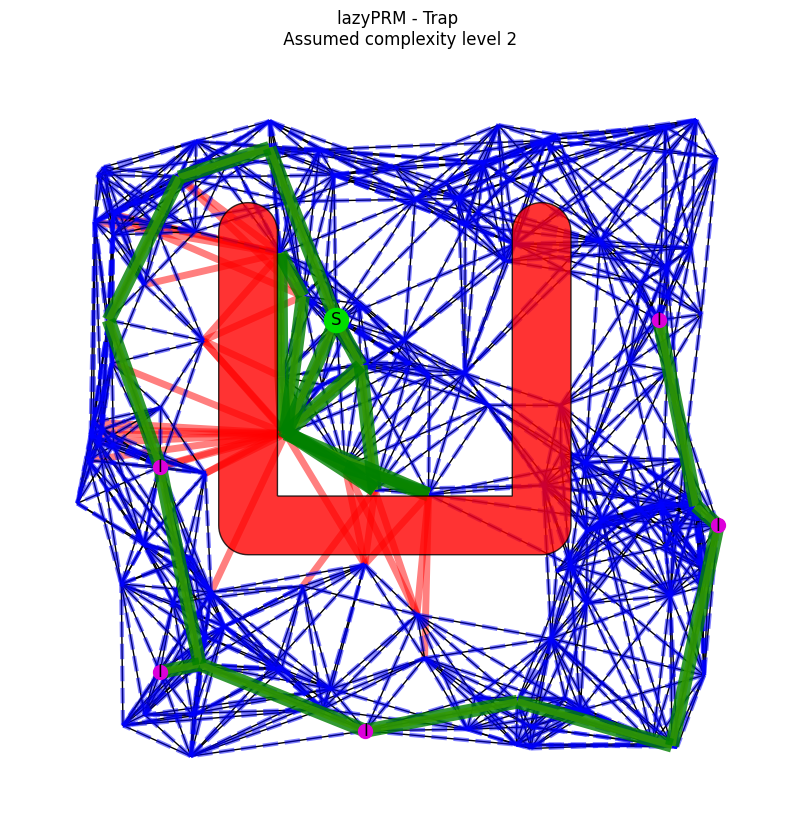

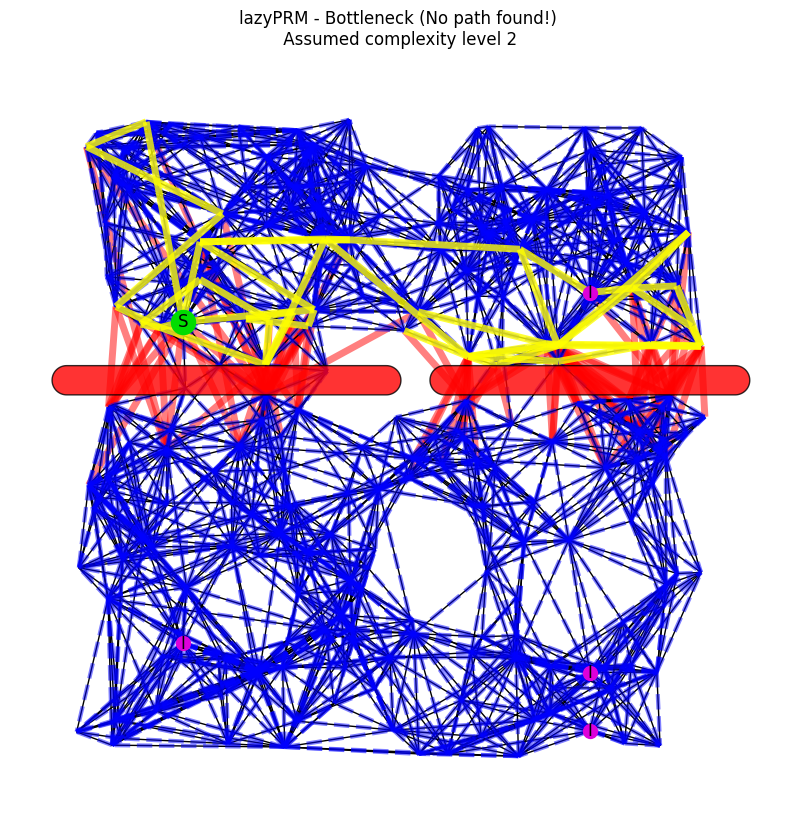

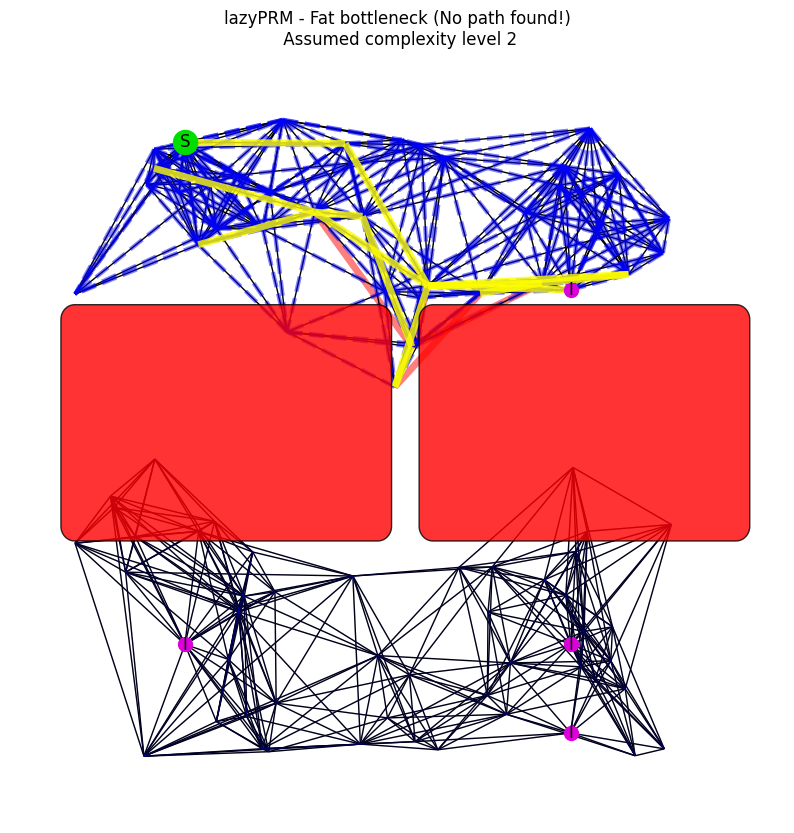

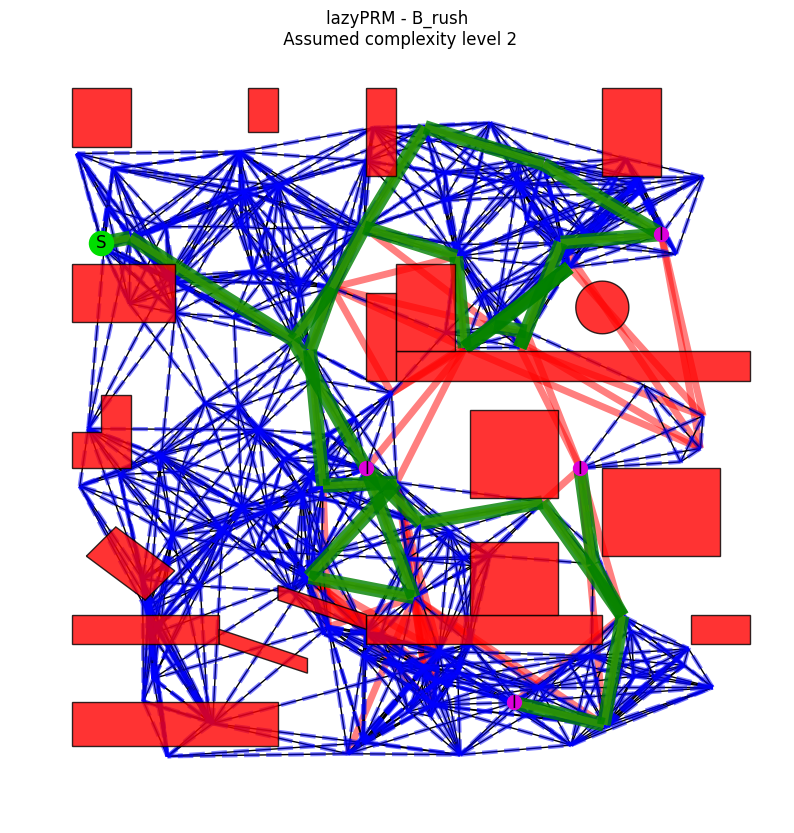

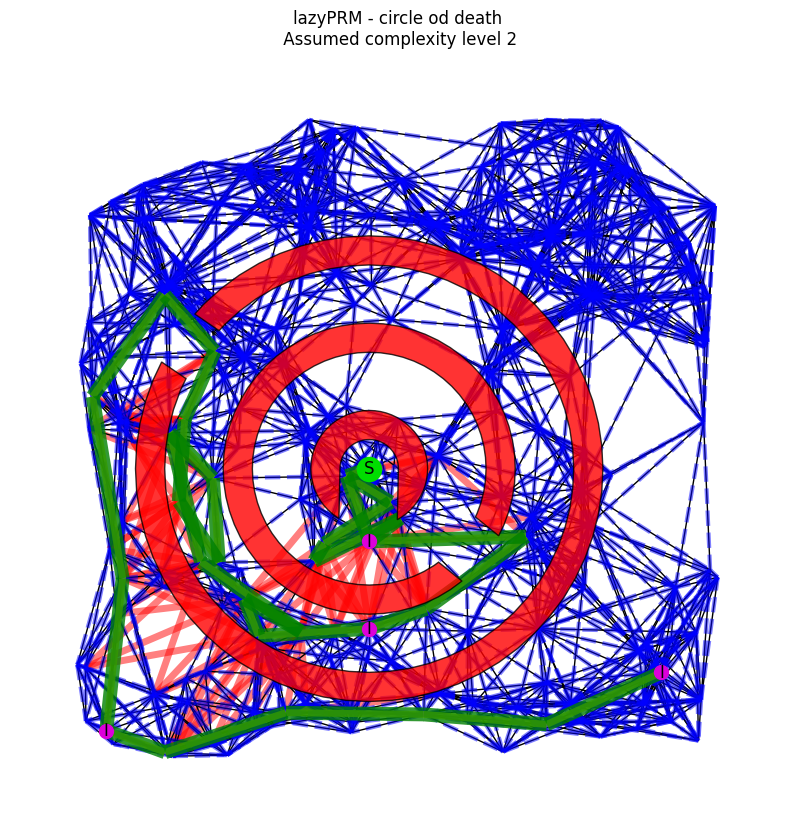

In [236]:
import matplotlib.pyplot as plt

for result in resultList:
    print(result)
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
        print("")
        print("Planner: "+ str(result.planner))
        print("Solution" + str(result.solution))

    except Exception as e:
        print ("Error")
        print(e)
        pass
    

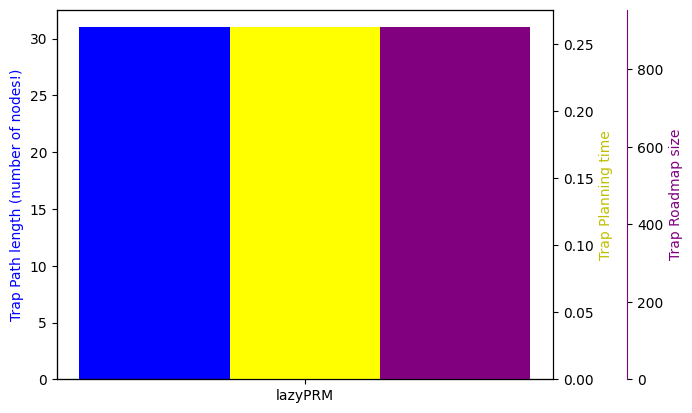

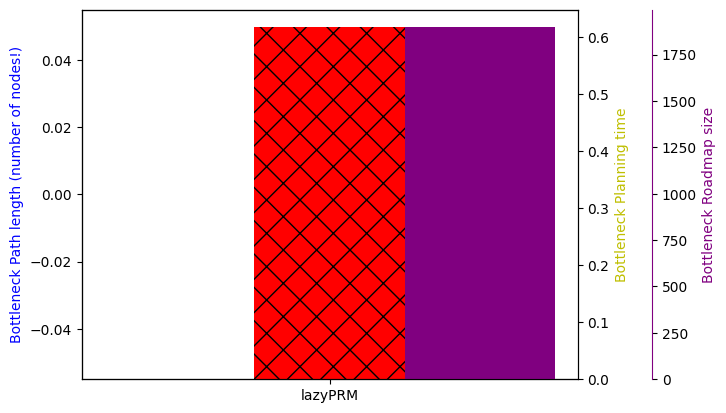

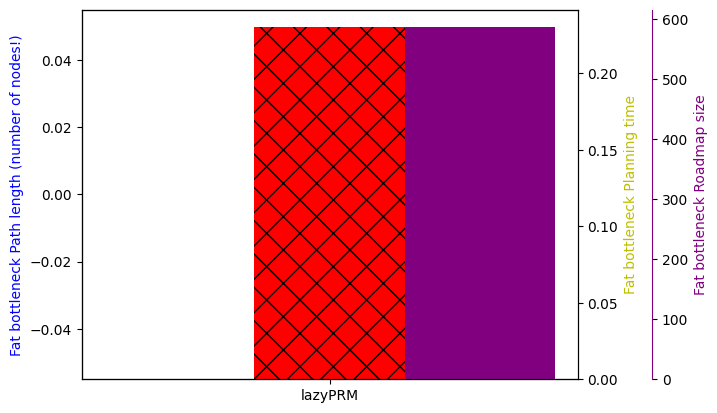

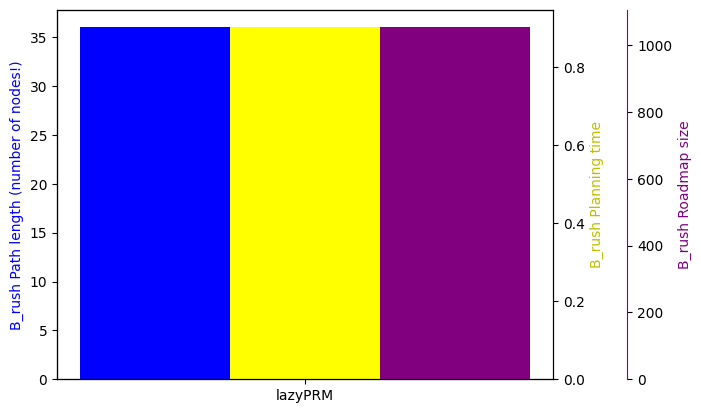

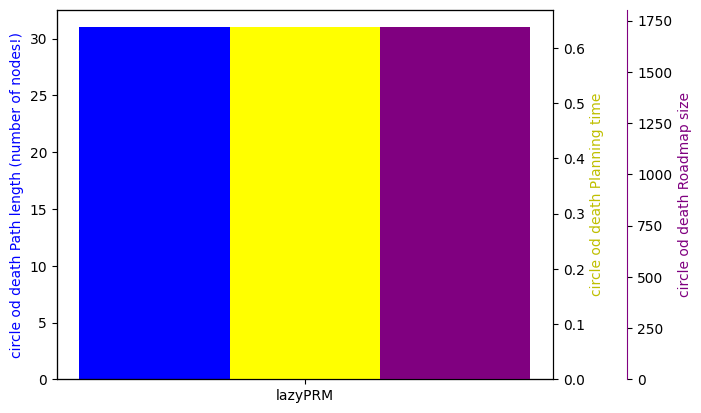

In [237]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [238]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                                 
_buildRoadmap                0.081666
_checkForCollisionAndUpdate  0.256637
_nearestInterim              0.004000
lineInCollision              0.196360
planRoundPath                0.637663
pointInCollision             0.221510

In [239]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

name                                               args kwargs  \
2884  planRoundPath  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   

                                                 retVal      time  
2884  [start, 37, interim1, 37, 58, 72, 74, 61, inte...  0.637663

In [240]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_23036\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0